"""
Data Challenge: Optimierung und Text-Mining mit Nachhaltigkeitsaspekten
1. Einführung

Willkommen zur Data Challenge!
In dieser Challenge werden wir uns mit der Analyse von Nachrichtenartikeln beschäftigen, um herauszufinden, welche Merkmale die Online-Beliebtheit beeinflussen. Dabei kombinieren wir klassische Optimierungsmethoden und Text-Mining-Techniken. Gleichzeitig achten wir auf nachhaltige Datenverarbeitung und setzen ressourcenschonende Methoden ein.

Ziele der Challenge:

    Verständnis für Feature-Engineering und Machine-Learning-Workflows gewinnen.
    Vergleichen, wie klassische Text-Mining-Methoden und moderne vortrainierte Modelle abschneiden.
    Ein Bewusstsein für die Nachhaltigkeit in der Datenverarbeitung entwickeln.
    Vorhersagen treffen und diese in einer überzeugenden Präsentation erklären.

2. Aufgabenstellung

Ihr erhaltet den Datensatz Online News Popularity Data Set, der Informationen über Nachrichtenartikel und deren Beliebtheit (Shares) enthält. Eure Aufgabe besteht darin, die folgenden Schritte durchzuführen:

    Link:
    https://www.kaggle.com/datasets/thehapyone/uci-online-news-popularity-data-set

    Datenvorbereitung:
        Analyse des Datensatzes.
        Extraktion von Features aus den vorhandenen Texten und URL-Links (z. B. Web Scraping).

    Feature-Engineering:
        Extraktion textbasierter Features: Sentiment, Polarity, Subjectivity.
        Identifikation weiterer relevanter Features, die die Shares beeinflussen könnten.

    Modellierung:
        Klassisches Clustering basierend auf den extrahierten Features.
        Aufbau eines Modells, um die Shares vorherzusagen.
        Bewertung der Feature Importance.

    Nachhaltigkeit:
        Diskutiert den Einfluss von ressourcenschonenden Methoden (z. B. Nutzung vortrainierter Modelle vs. einfache Machine-Learning-Verfahren).

    Minimal Viable Product (MVP):
        Vorhersage der Shares auf bereitgestellten Testdaten.
        Präsentation der Ergebnisse und des Modells in Form von Slides oder Dokumenten.

3. Einreichung

Jede Gruppe reicht folgende Elemente ein:

    Vorhersage-Datei: Eine CSV mit den Shares für die Testdaten.
    Präsentation: Eine kurze Beschreibung des Ansatzes, der Ergebnisse und der Nachhaltigkeitsdiskussion.
    Notebook: Die komplette Analyse in einem ausführbaren Jupyter Notebook.

4. Bewertungskriterien

    Genauigkeit der Vorhersagen: Wie gut passt das Modell auf die Testdaten?
    Nachhaltigkeit: Reflektion über Ressourceneffizienz.
    Innovationsgrad: Kreativität bei Feature-Engineering und Methodik.
    Präsentation: Klarheit und Nachvollziehbarkeit der Ergebnisse.

5. Zeitplan

    Startdatum: [xx.xx.xxxx]
    Abgabedatum: [xx.xx.xxxx]
    Preisverleihung: [xx.xx.xxxx]

6. Zusatzressourcen

    Einführung in JupyterLab: https://jupyter.org/
    Scikit-Learn Documentation: https://scikit-learn.org
    TextBlob Documentation: https://textblob.readthedocs.io

""""


In [1]:
# =============================================================================
# Data Challenge: Optimierung und Text-Mining mit Nachhaltigkeitsaspekten
# Datum: Februar 2025
#
# Dieses Notebook umfasst:
#  A. Datenvorbereitung und Explorative Data Analysis (EDA)
#  B. Feature-Engineering (inkl. winsorisieren, log-Transformation, textbasierte Features)
#  C. Modellierung: Vergleich klassischer ML-Modelle unter Verwendung von MAE,
#     Hyperparametertuning (Random Forest) und zusätzlichen Visualisierungen
#     (Residual Plots und Modellvergleich als Balkendiagramm)
#  D. Nachhaltigkeitsanalyse: Trainings- und Inferenzzeiten messen
#
# Zusätzlich: Dokumentierter Pseudocode für Webscraping und Textanalyse.
# =============================================================================

# =============================================================================
# A. Imports und Setup
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import tracemalloc

# Machine Learning Modelle und Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Textbasierte Feature-Extraktion
from textblob import TextBlob
import textstat
from bs4 import BeautifulSoup
import requests

# Transformer-Modelle für Text-Embeddings
from sentence_transformers import SentenceTransformer
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"


/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-02-28 18:08:27.143493: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-28 18:08:27.305347: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-28 18:08:31.032504: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
""""
Schritt-für-Schritt-Anleitung

A. Datenvorbereitung

    Ladet den Datensatz herunter und untersucht ihn.
    Webscraping: Extrahiert zusätzliche Features aus den URLs (z. B. Textinhalt, Meta-Tags).
    Datenbereinigung: Überprüft auf fehlende oder fehlerhafte Werte und bereinigt den Datensatz entsprechend.
"""


'"\nSchritt-für-Schritt-Anleitung\n\nA. Datenvorbereitung\n\n    Ladet den Datensatz herunter und untersucht ihn.\n    Webscraping: Extrahiert zusätzliche Features aus den URLs (z. B. Textinhalt, Meta-Tags).\n    Datenbereinigung: Überprüft auf fehlende oder fehlerhafte Werte und bereinigt den Datensatz entsprechend.\n'

Originale Spaltennamen:
['url', ' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negative_words', '

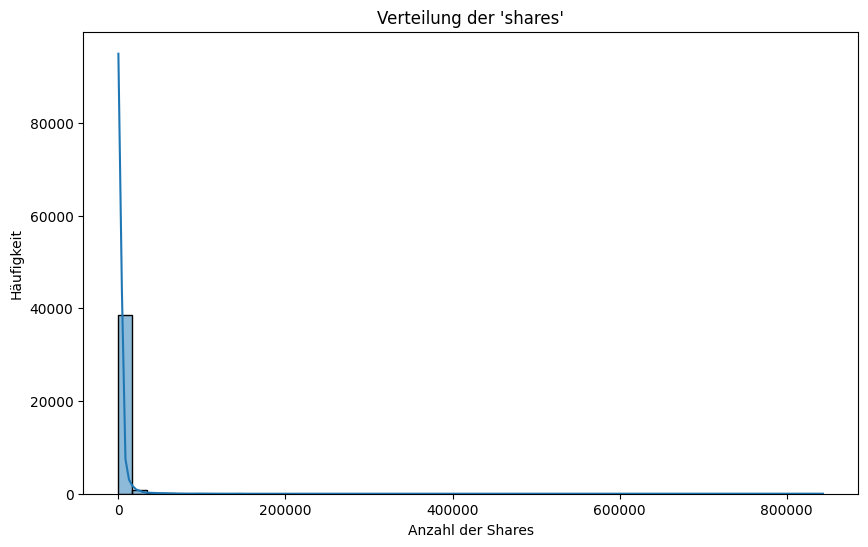

In [3]:

# =============================================================================
# B. Datenvorbereitung und EDA
# =============================================================================

# 1. Datensatz laden
dateipfad = "OnlineNewsPopularity.csv"  # Pfad anpassen, falls nötig
df = pd.read_csv(dateipfad)

# 2. Spaltennamen bereinigen
print("Originale Spaltennamen:")
print(df.columns.tolist())
df.columns = df.columns.str.strip()  # Entferne führende/nachfolgende Leerzeichen
print("\nBereinigte Spaltennamen:")
print(df.columns.tolist())

# 3. Erste Explorative Data Analysis (EDA)
print("\nErste 5 Zeilen des Datensatzes:")
print(df.head())
print("\nInformationen zum Datensatz:")
print(df.info())
print("\nStatistische Übersicht (numerisch):")
print(df.describe())
print("\nAnzahl der fehlenden Werte pro Spalte:")
print(df.isnull().sum())

# 4. Zielvariable 'shares' untersuchen
plt.figure(figsize=(10, 6))
sns.histplot(df['shares'], bins=50, kde=True)
plt.title("Verteilung der 'shares'")
plt.xlabel("Anzahl der Shares")
plt.ylabel("Häufigkeit")
plt.show()

Binäre Variablen: ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend']
Kontinuierliche Variablen: ['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_nega

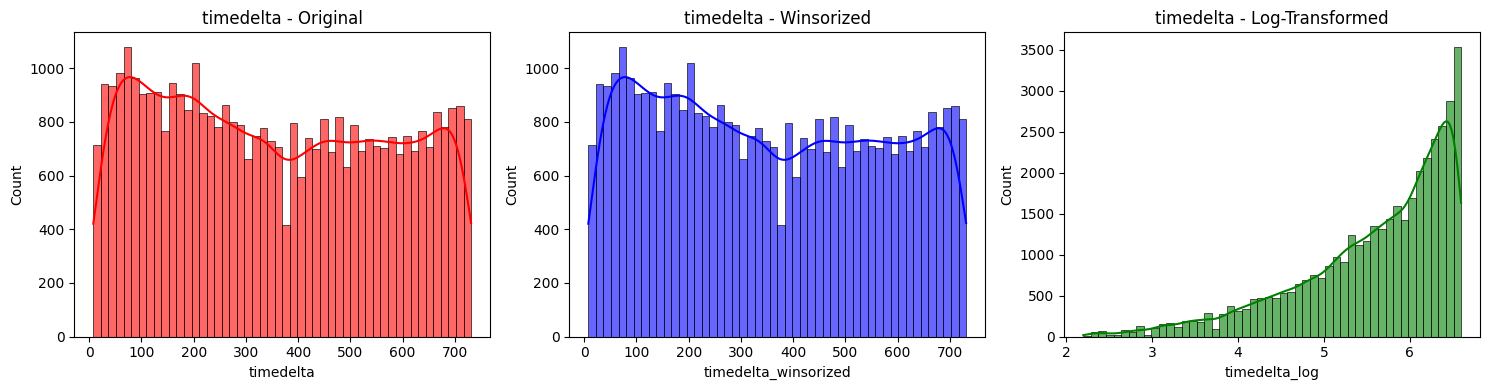

n_tokens_title: Original: Untere Grenze = 4.50, Obere Grenze = 16.50


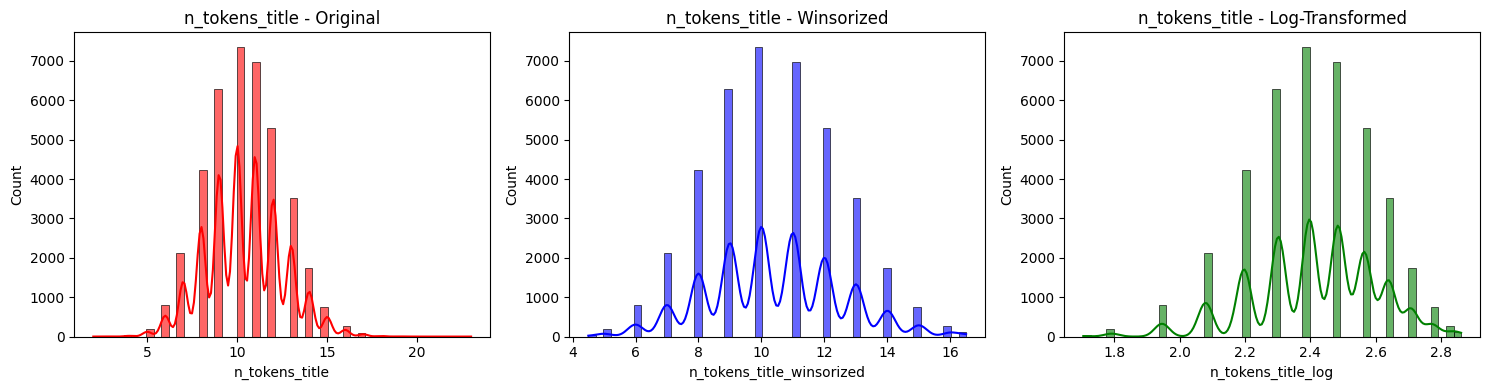

n_tokens_content: Original: Untere Grenze = 0.00, Obere Grenze = 1421.00


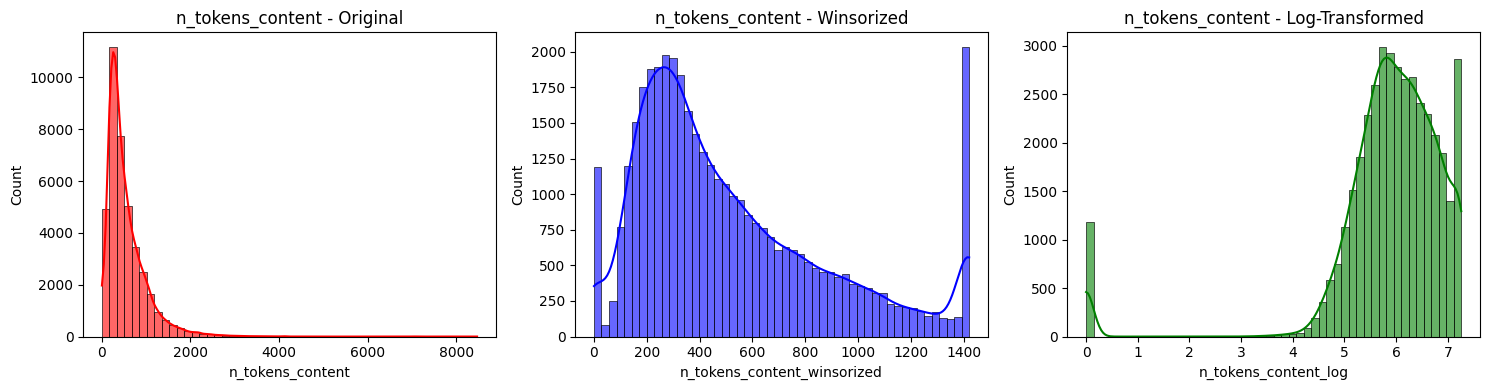

n_unique_tokens: Original: Untere Grenze = 0.26, Obere Grenze = 0.82


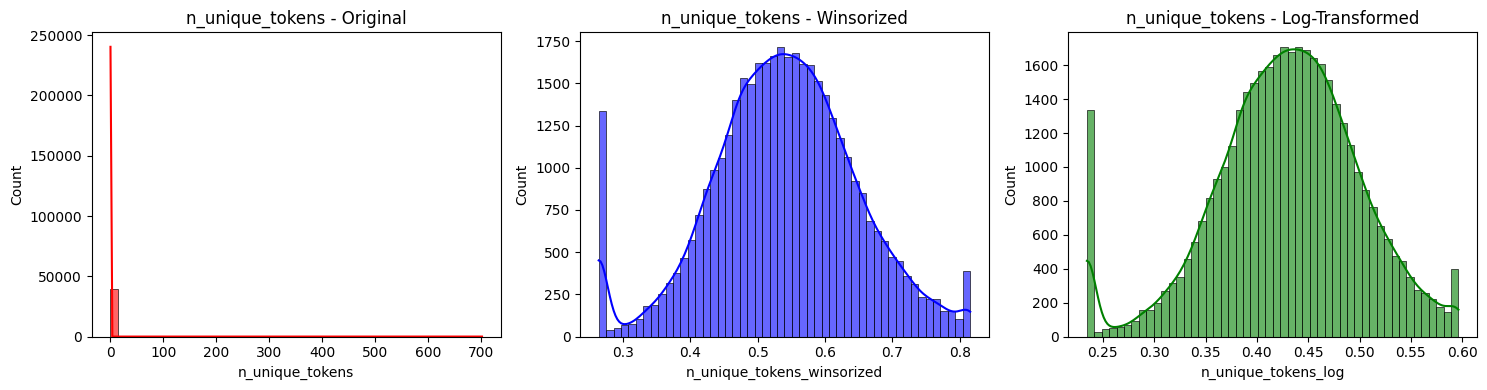

n_non_stop_words: Original: Untere Grenze = 1.00, Obere Grenze = 1.00


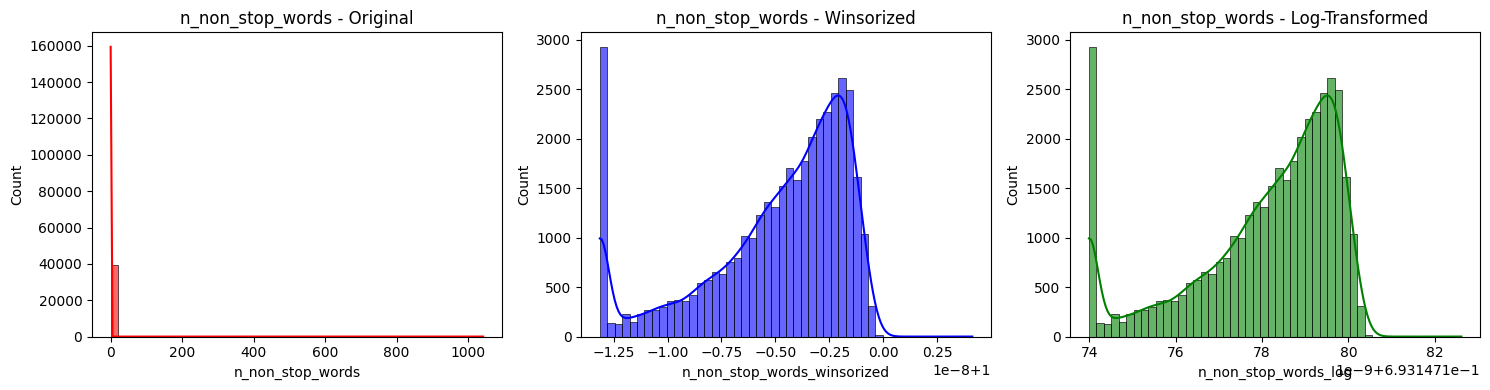

n_non_stop_unique_tokens: Original: Untere Grenze = 0.43, Obere Grenze = 0.95


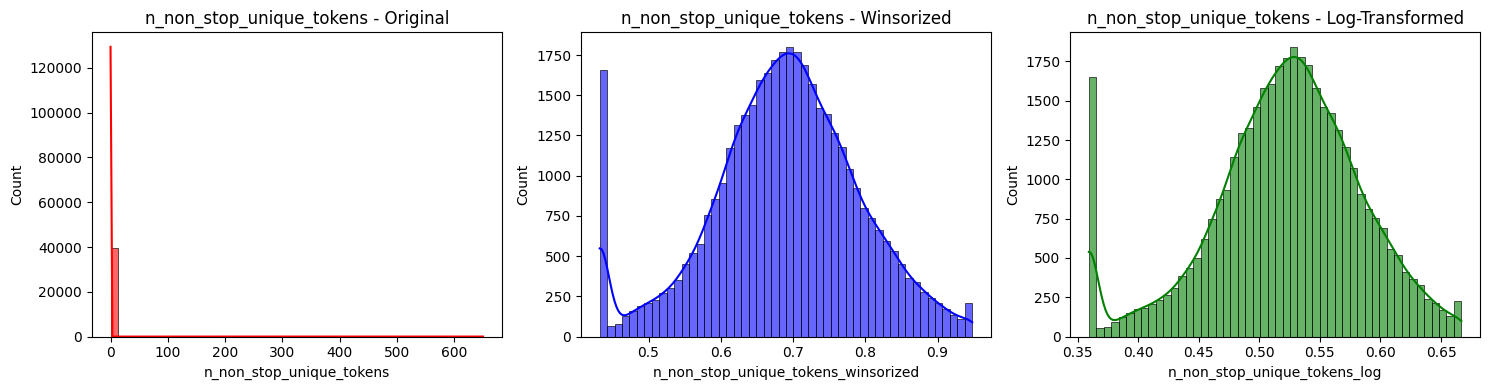

num_hrefs: Original: Untere Grenze = 0.00, Obere Grenze = 29.00


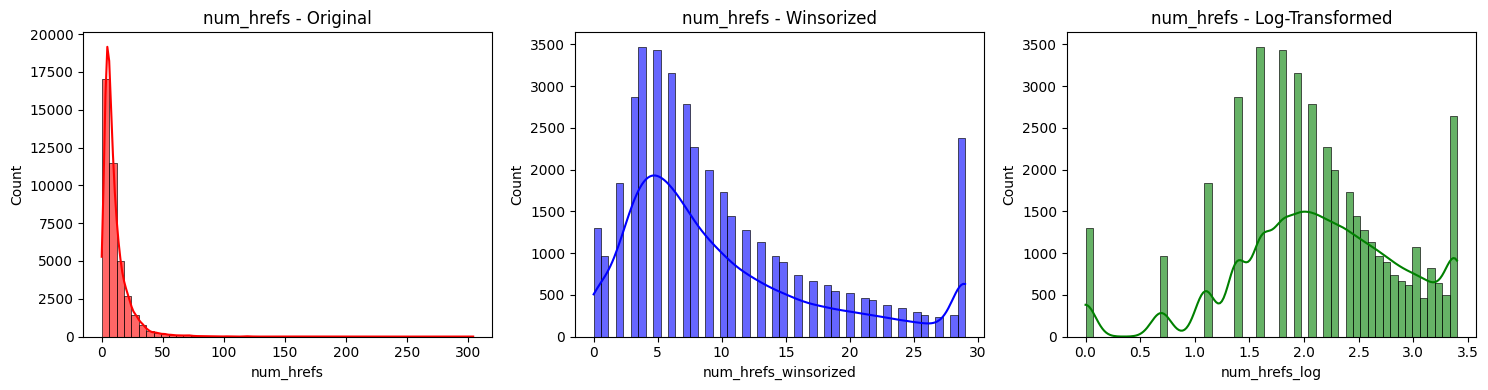

num_self_hrefs: Original: Untere Grenze = 0.00, Obere Grenze = 8.50


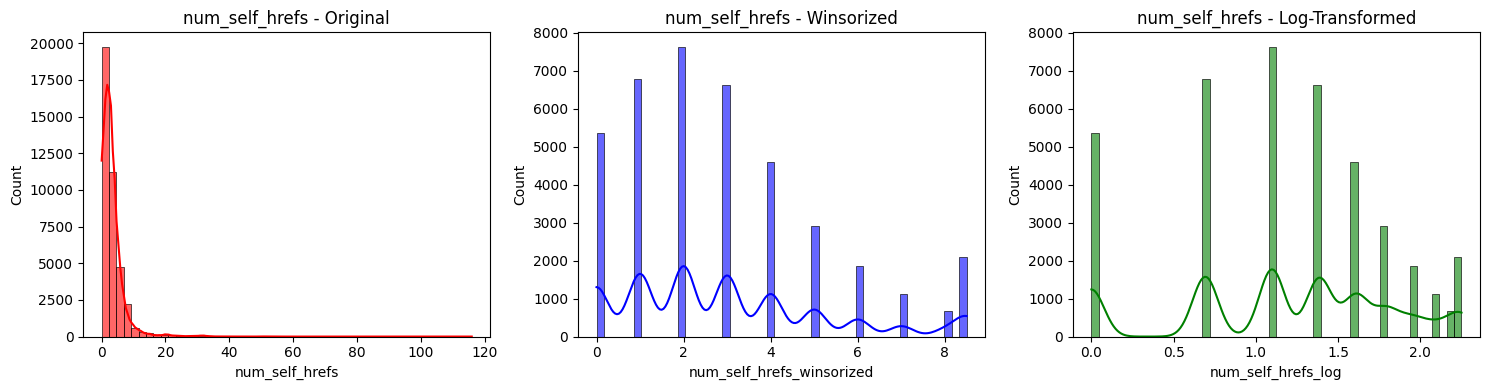

num_imgs: Original: Untere Grenze = 0.00, Obere Grenze = 8.50


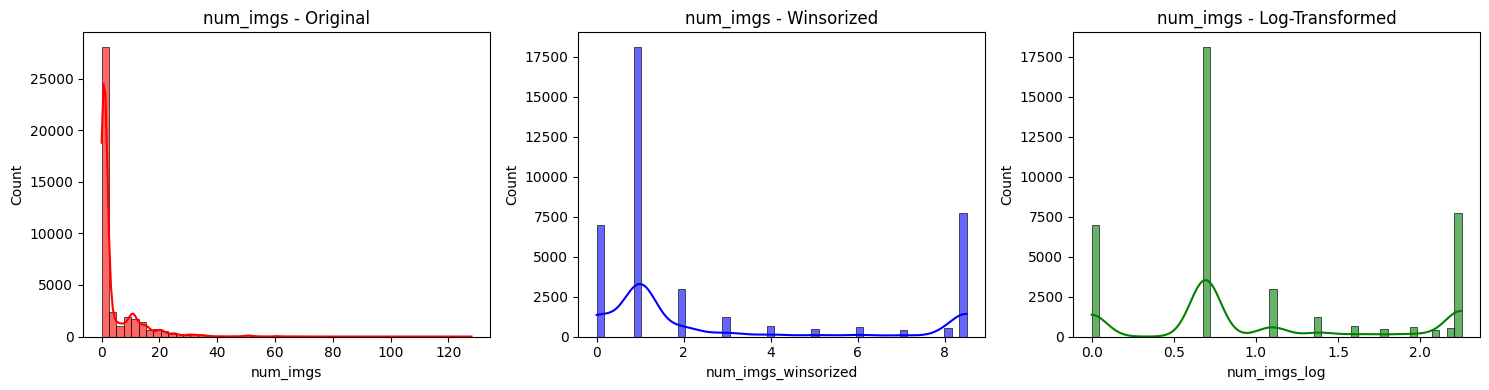

num_videos: Original: Untere Grenze = 0.00, Obere Grenze = 2.50


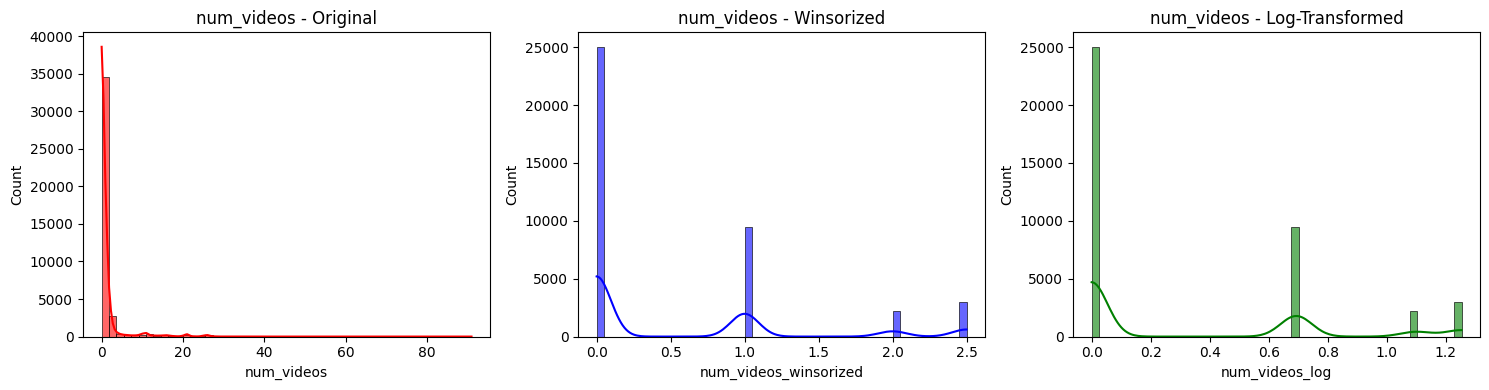

average_token_length: Original: Untere Grenze = 3.91, Obere Grenze = 5.42


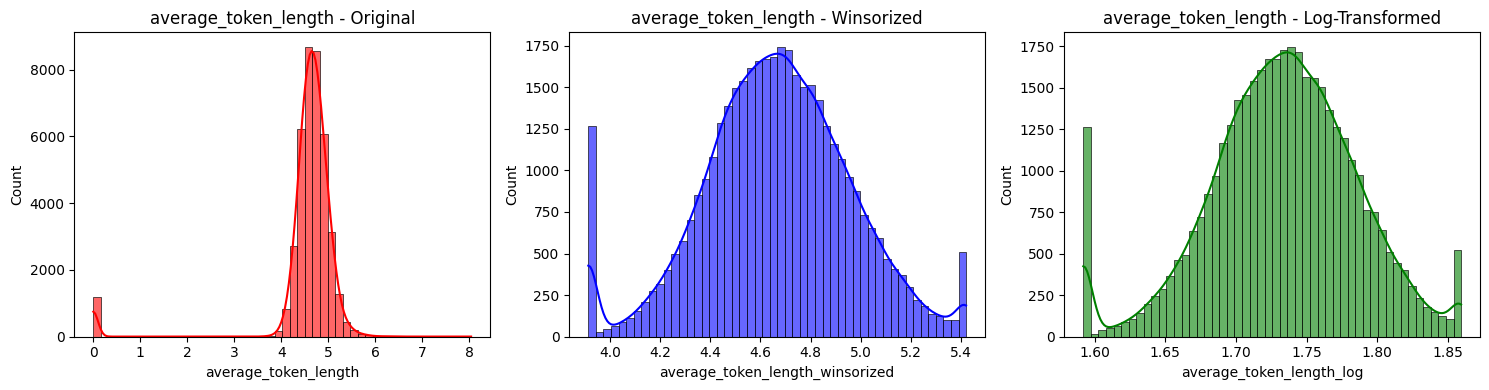

num_keywords: Original: Untere Grenze = 1.50, Obere Grenze = 13.50


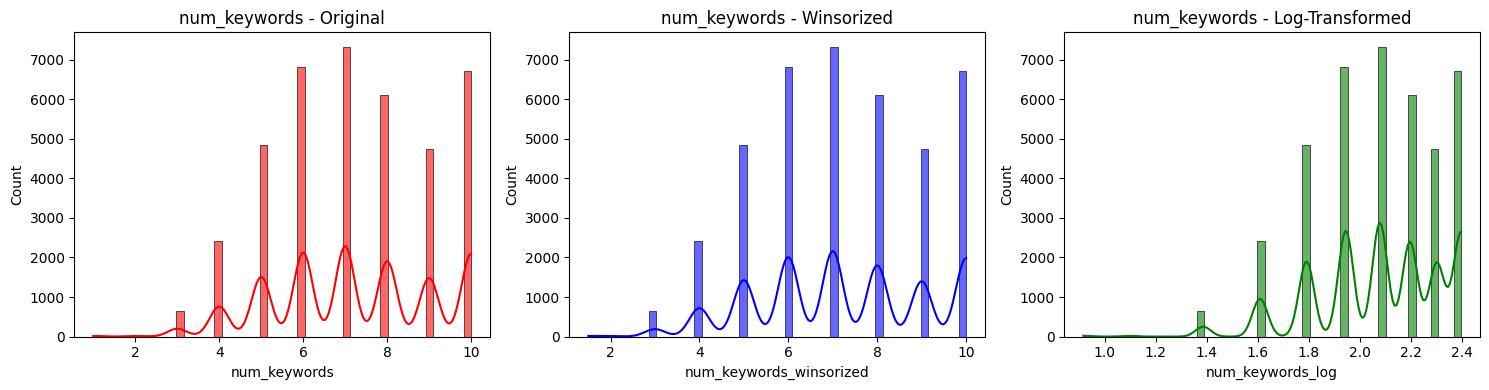

kw_min_min: Original: Untere Grenze = 0.00, Obere Grenze = 11.50


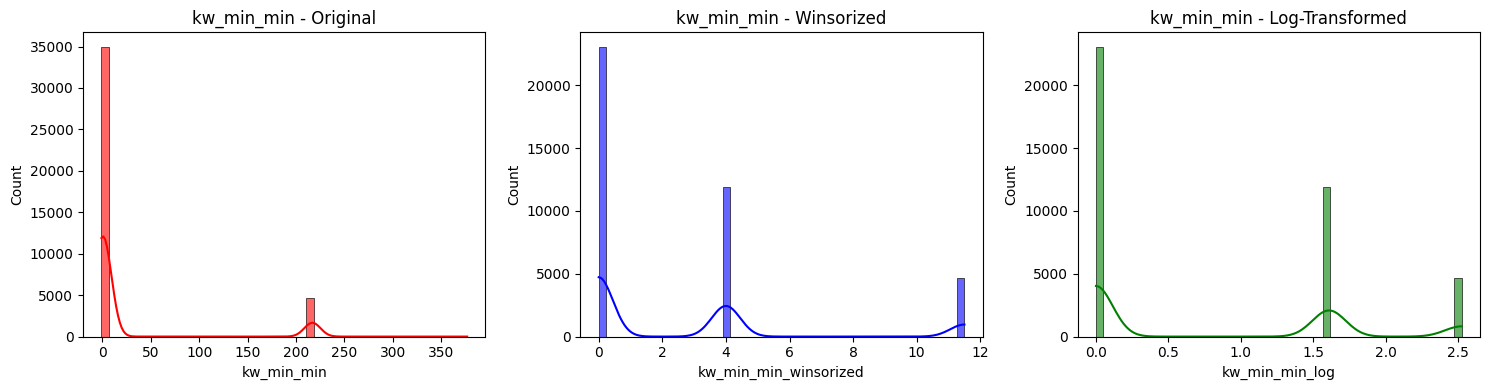

kw_max_min: Original: Untere Grenze = 0.00, Obere Grenze = 1832.50


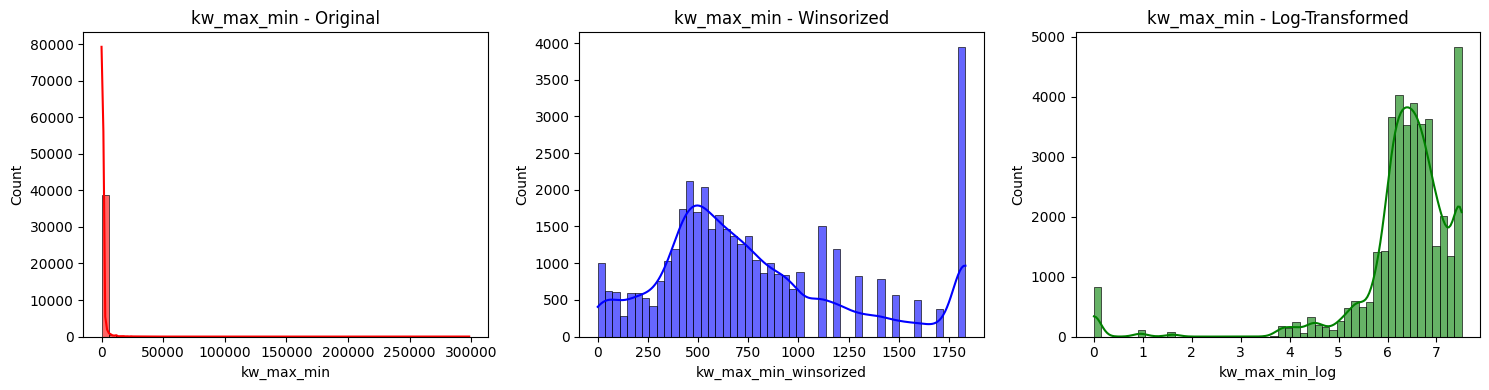

kw_avg_min: Original: Untere Grenze = 0.00, Obere Grenze = 679.88


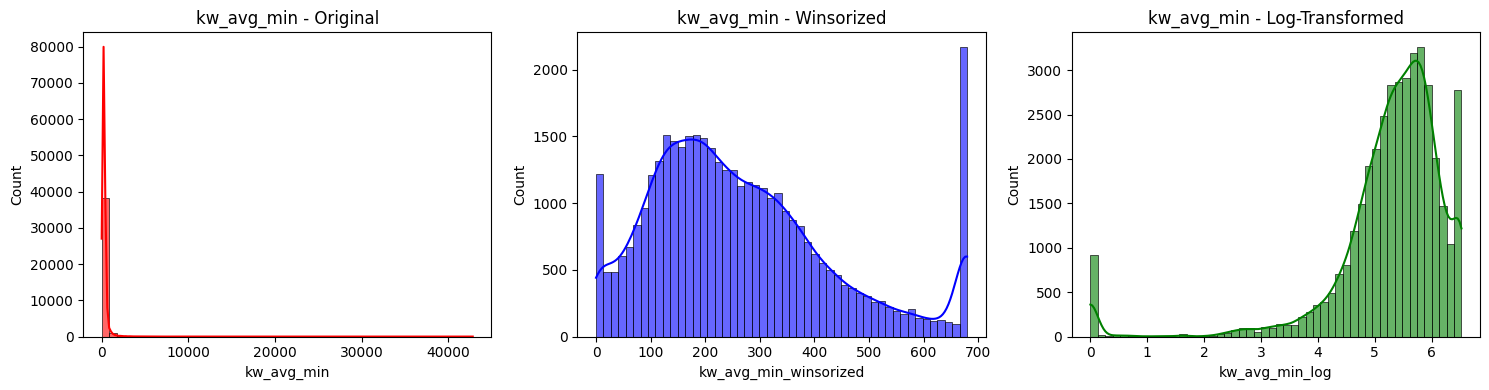

kw_min_max: Original: Untere Grenze = 0.00, Obere Grenze = 19750.00


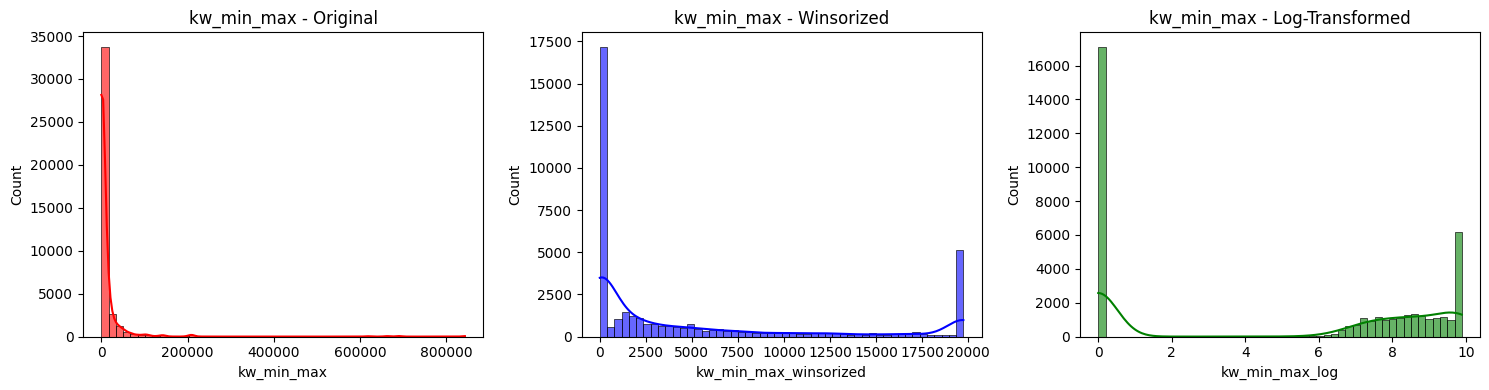

kw_max_max: Original: Untere Grenze = 843300.00, Obere Grenze = 843300.00


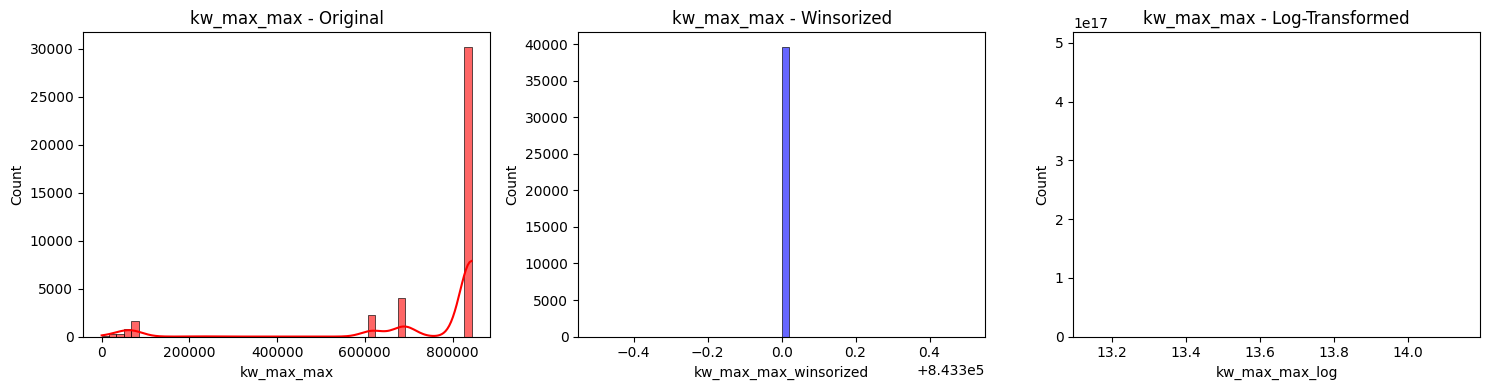

kw_avg_max: Original: Untere Grenze = 0.00, Obere Grenze = 568179.69


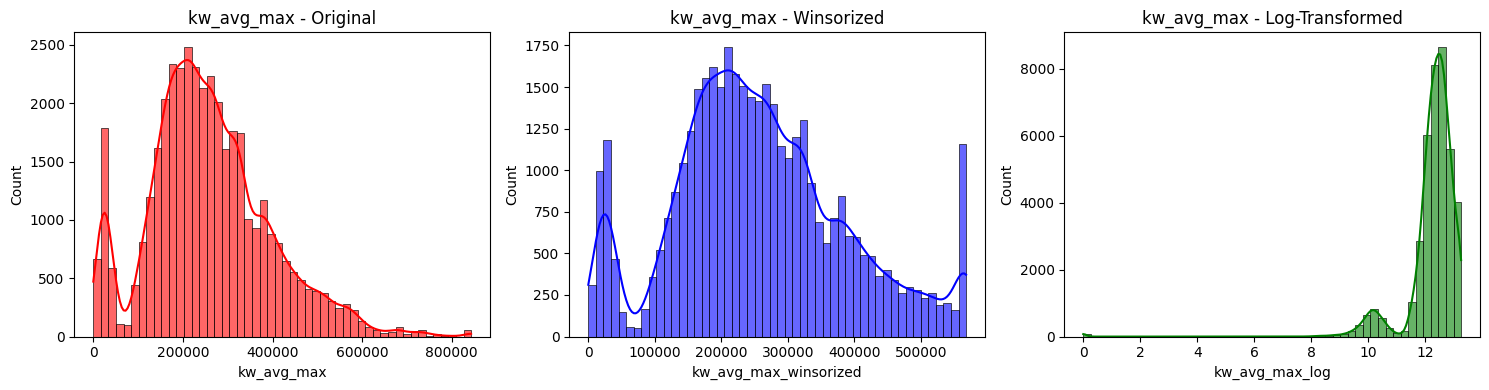

kw_min_avg: Original: Untere Grenze = 0.00, Obere Grenze = 5141.95


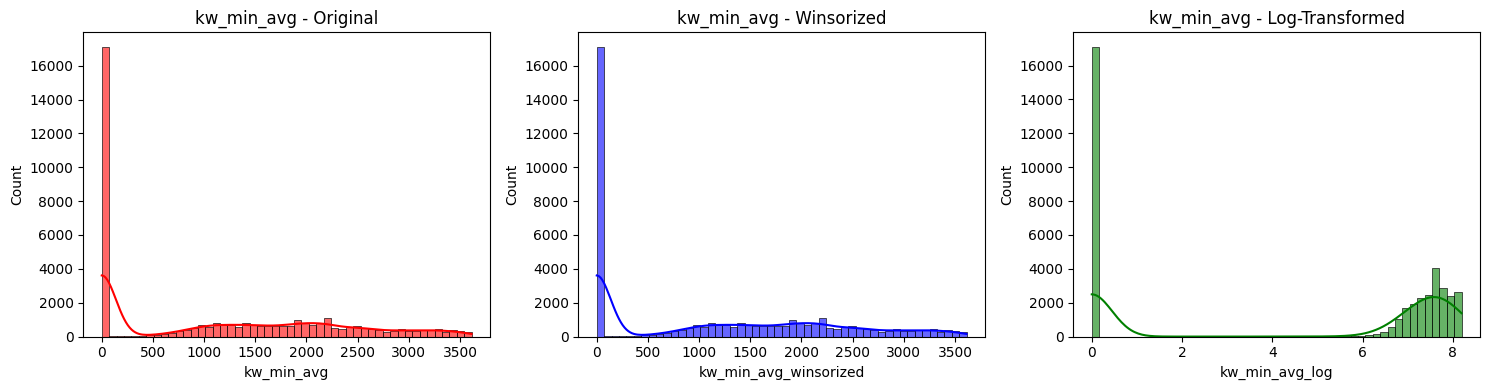

kw_max_avg: Original: Untere Grenze = 0.00, Obere Grenze = 9706.73


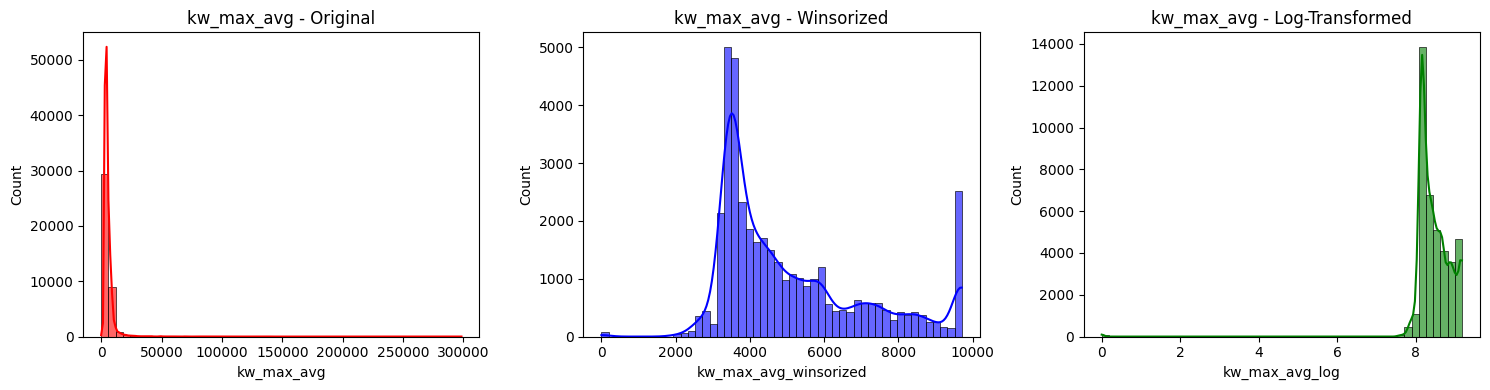

kw_avg_avg: Original: Untere Grenze = 555.78, Obere Grenze = 5426.90


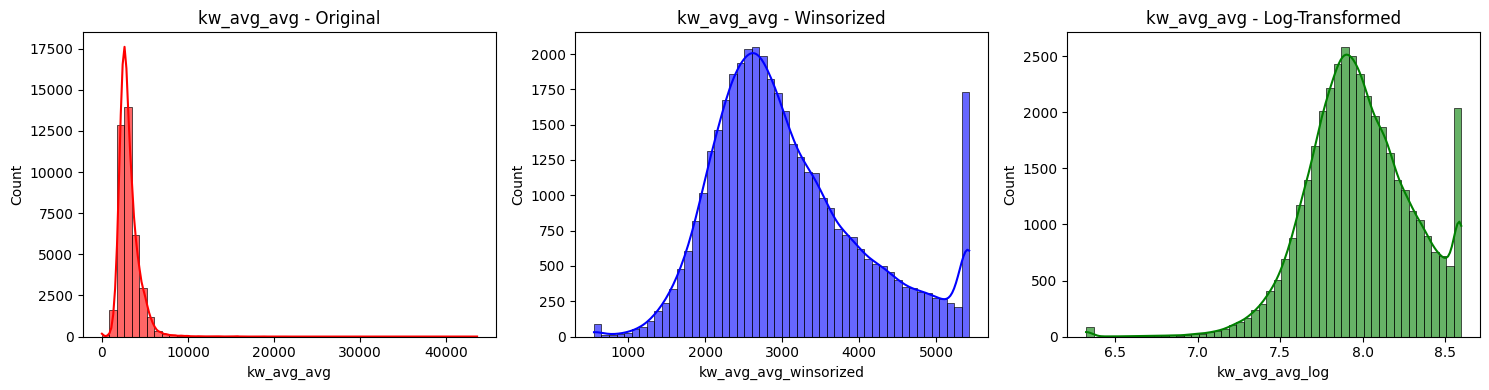

self_reference_min_shares: Original: Untere Grenze = 0.00, Obere Grenze = 5541.50


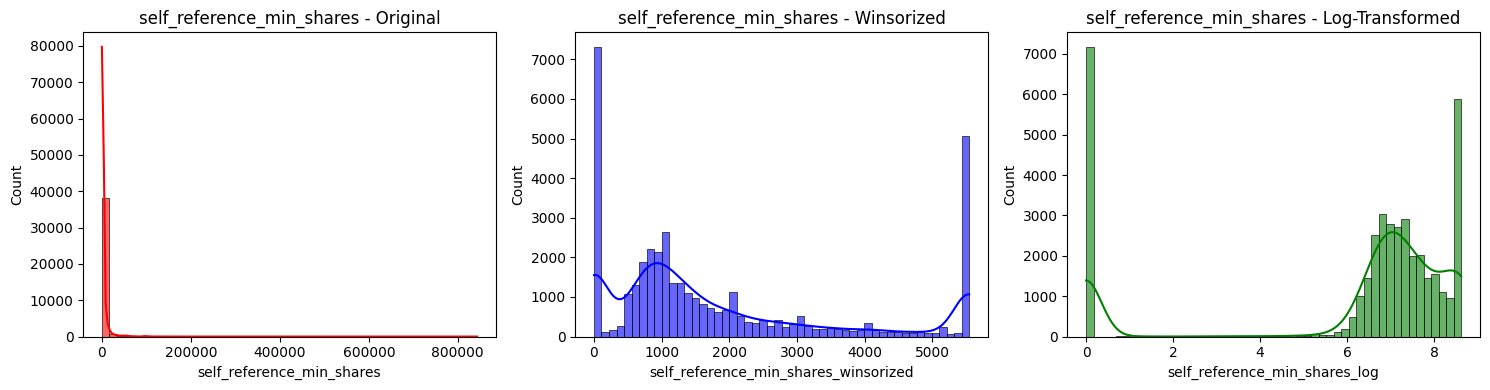

self_reference_max_shares: Original: Untere Grenze = 0.00, Obere Grenze = 18350.00


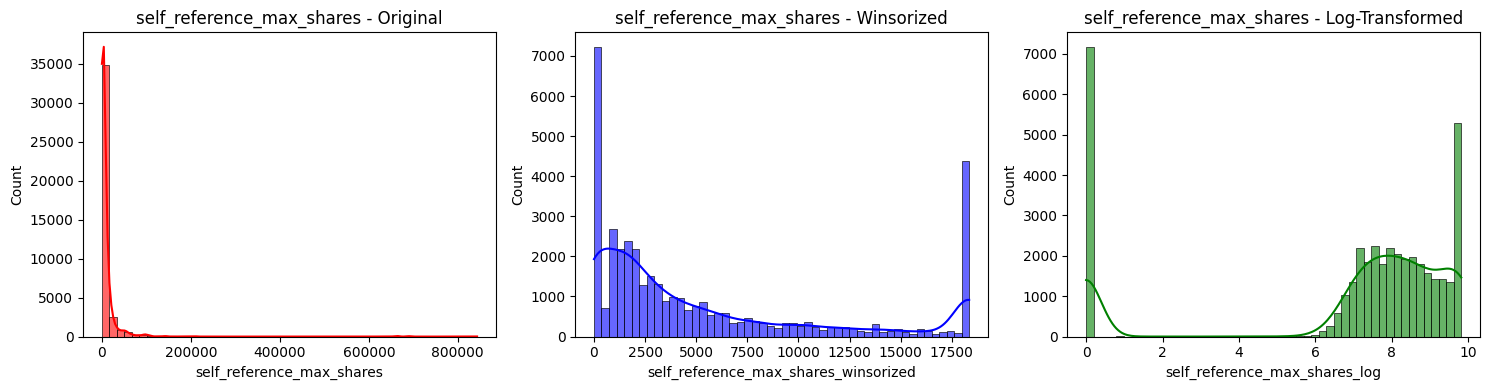

self_reference_avg_sharess: Original: Untere Grenze = 0.00, Obere Grenze = 11528.22


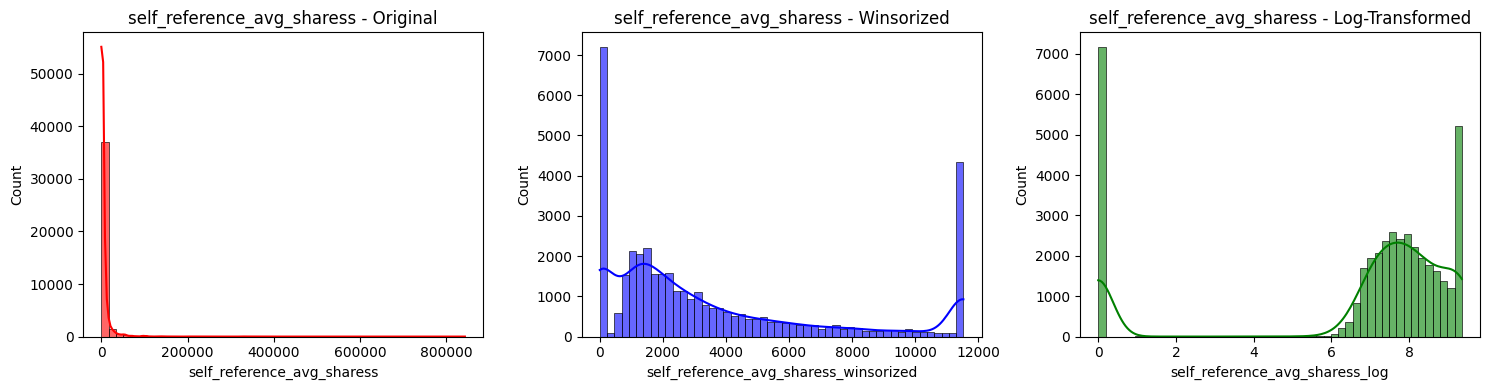

LDA_00: Original: Untere Grenze = 0.00, Obere Grenze = 0.56


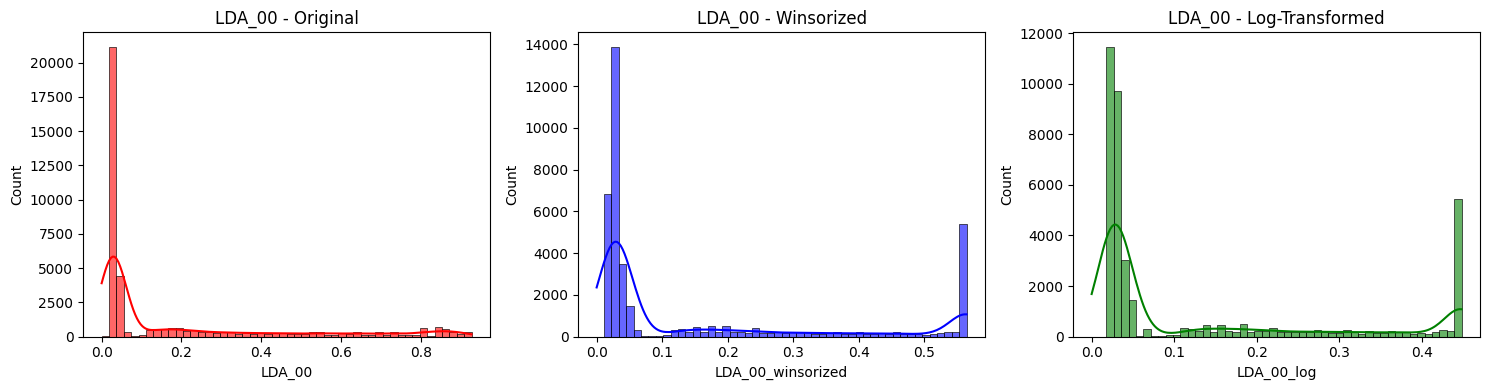

LDA_01: Original: Untere Grenze = 0.00, Obere Grenze = 0.34


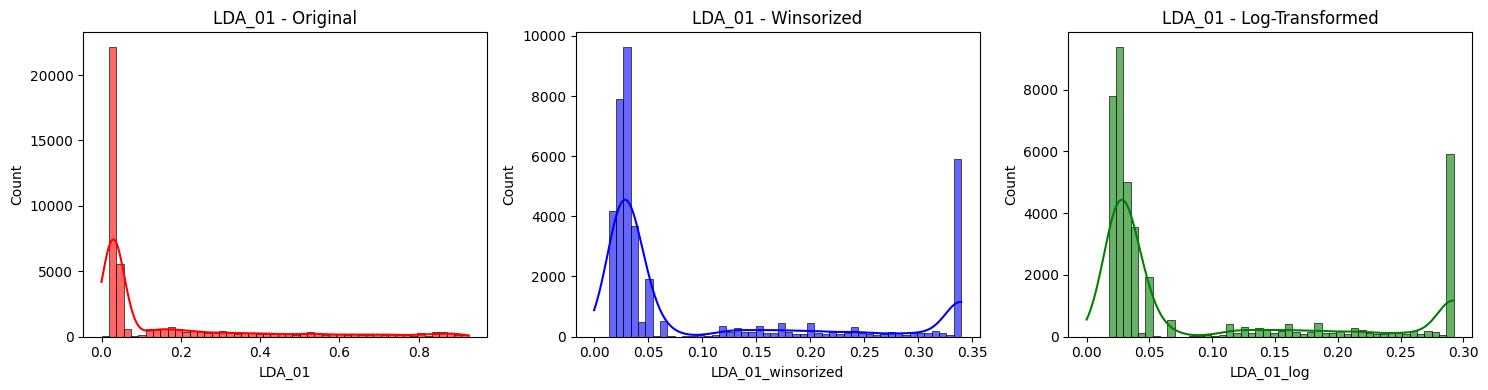

LDA_02: Original: Untere Grenze = 0.00, Obere Grenze = 0.79


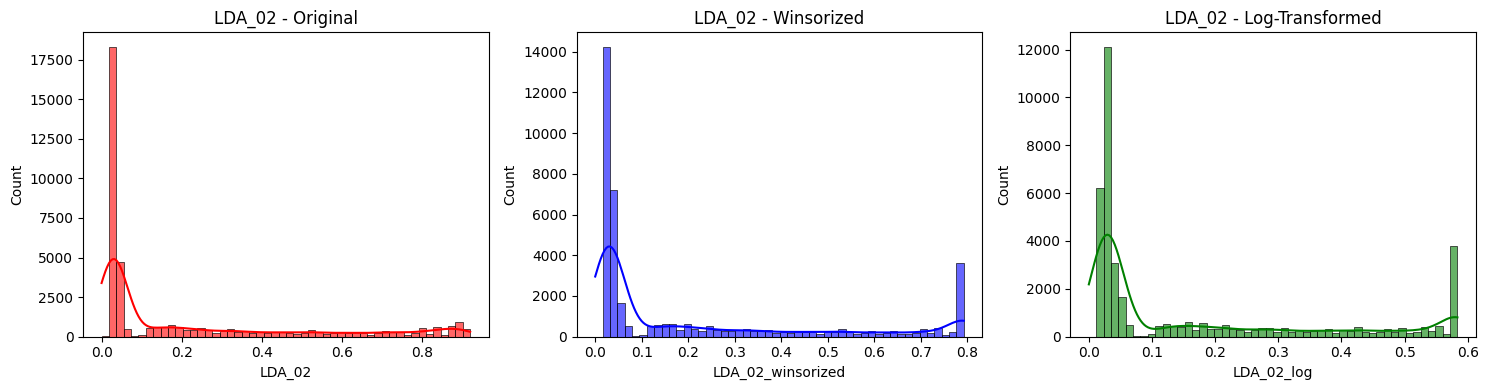

LDA_03: Original: Untere Grenze = 0.00, Obere Grenze = 0.90


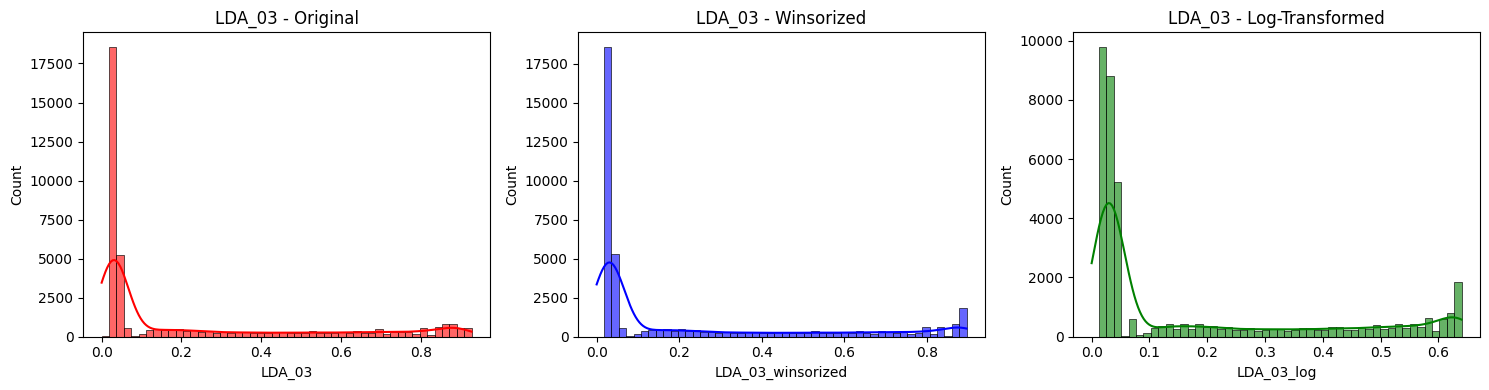

LDA_04: Original: Untere Grenze = 0.00, Obere Grenze = 0.96


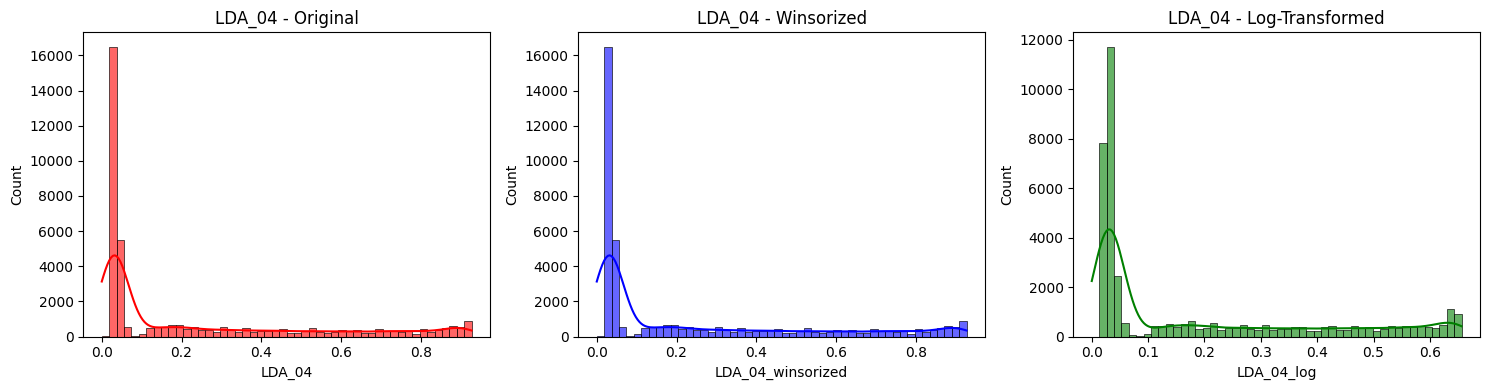

global_subjectivity: Original: Untere Grenze = 0.23, Obere Grenze = 0.68


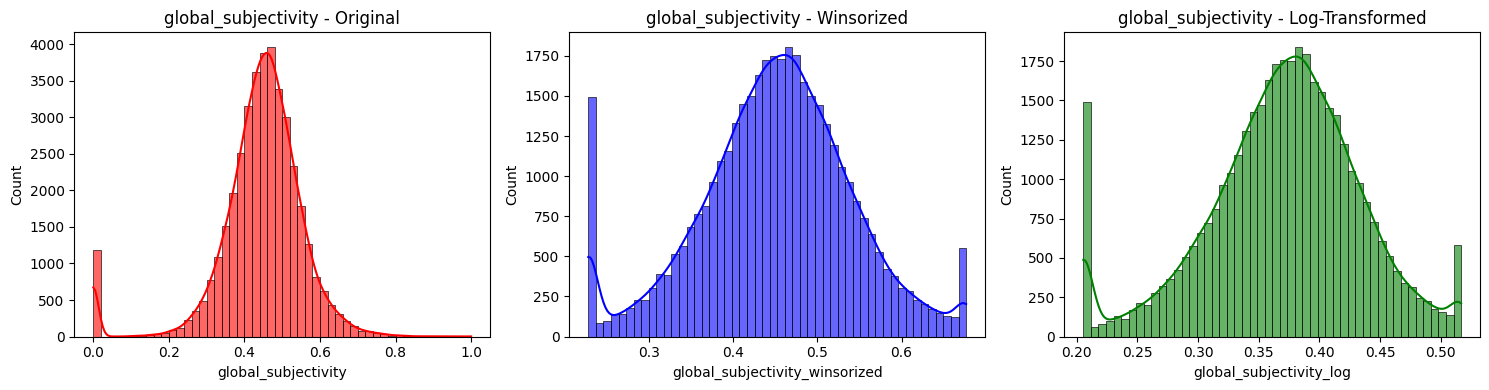

global_sentiment_polarity: Original: Untere Grenze = 0.00, Obere Grenze = 0.36


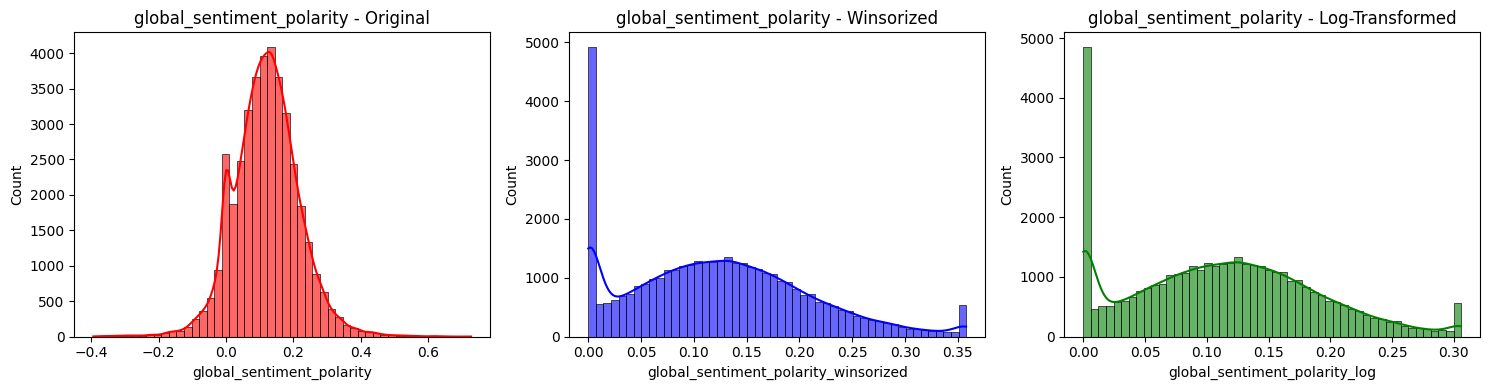

global_rate_positive_words: Original: Untere Grenze = 0.00, Obere Grenze = 0.08


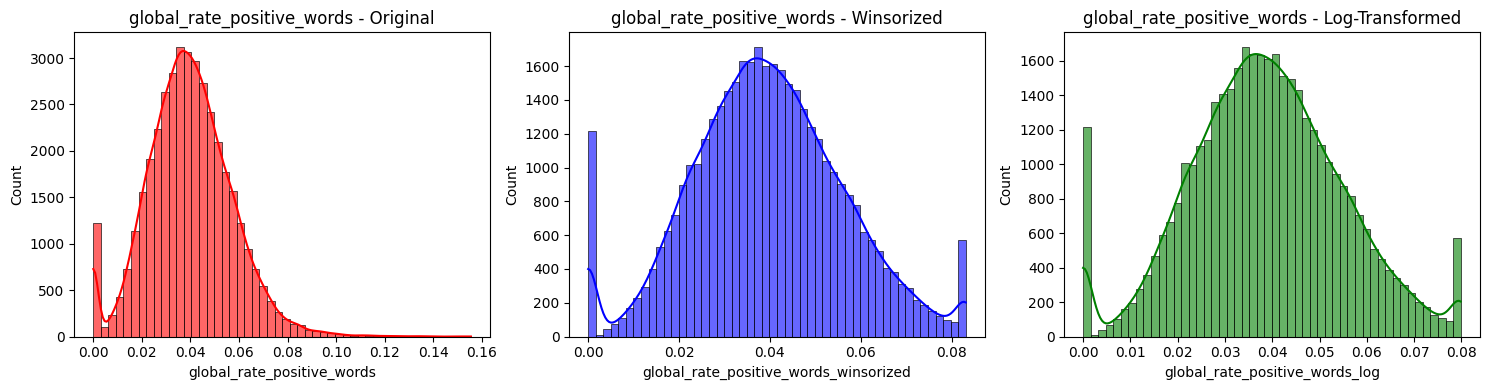

global_rate_negative_words: Original: Untere Grenze = 0.00, Obere Grenze = 0.04


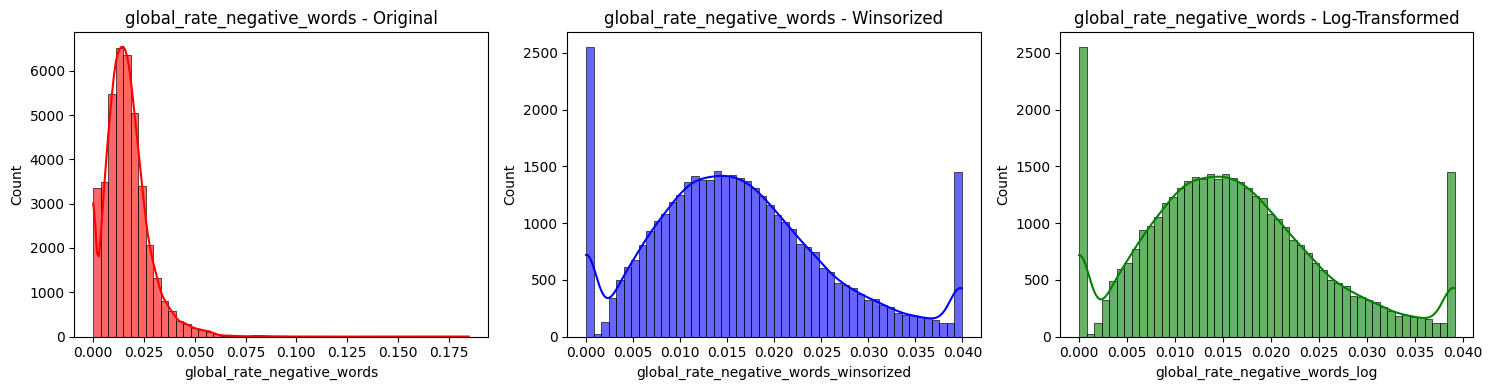

rate_positive_words: Original: Untere Grenze = 0.30, Obere Grenze = 1.10


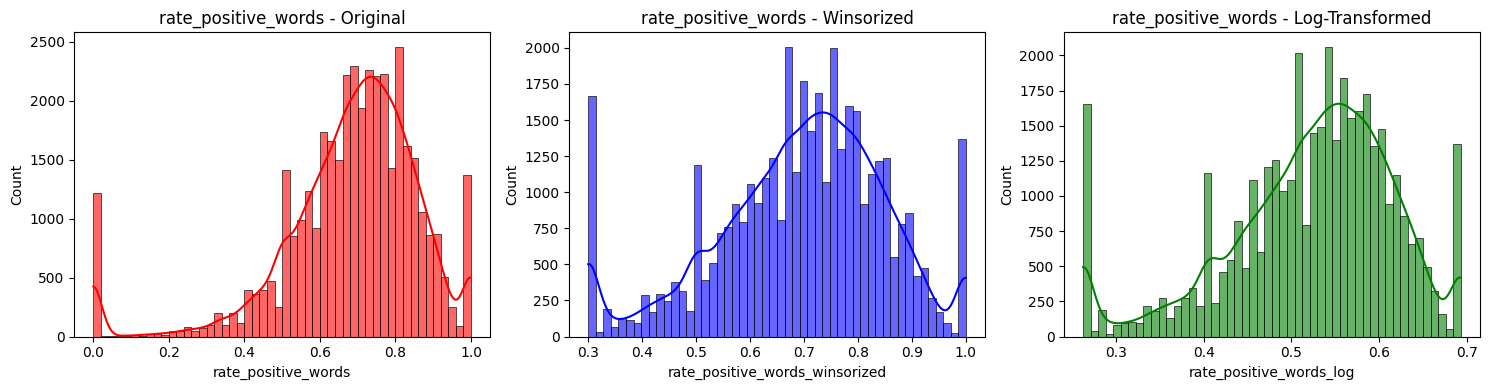

rate_negative_words: Original: Untere Grenze = 0.00, Obere Grenze = 0.68


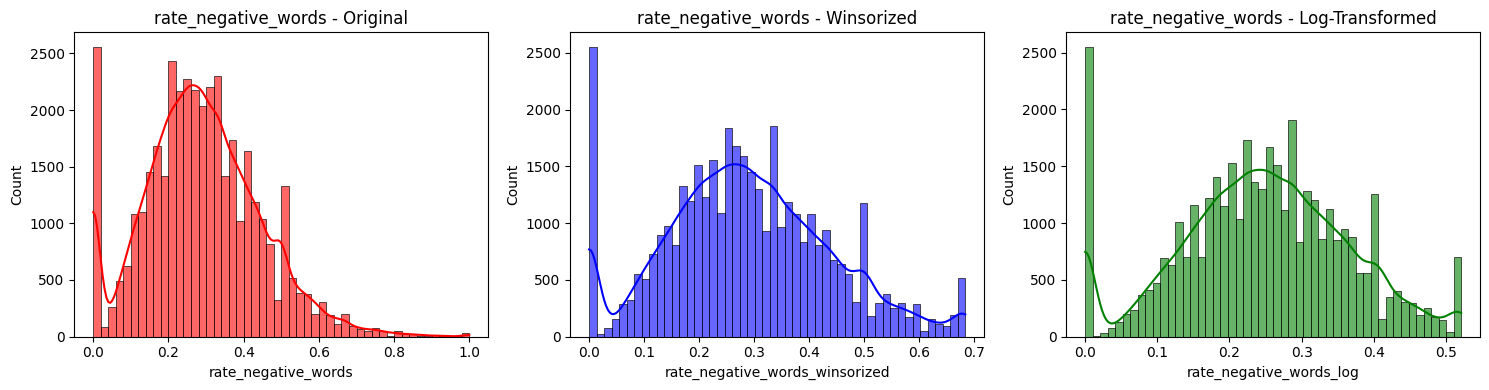

avg_positive_polarity: Original: Untere Grenze = 0.15, Obere Grenze = 0.57


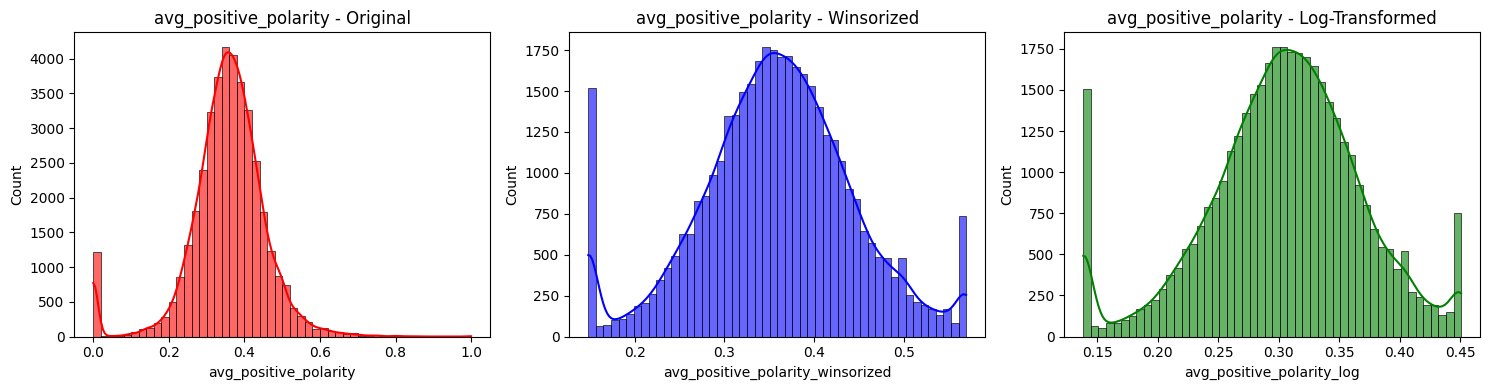

min_positive_polarity: Original: Untere Grenze = 0.00, Obere Grenze = 0.18


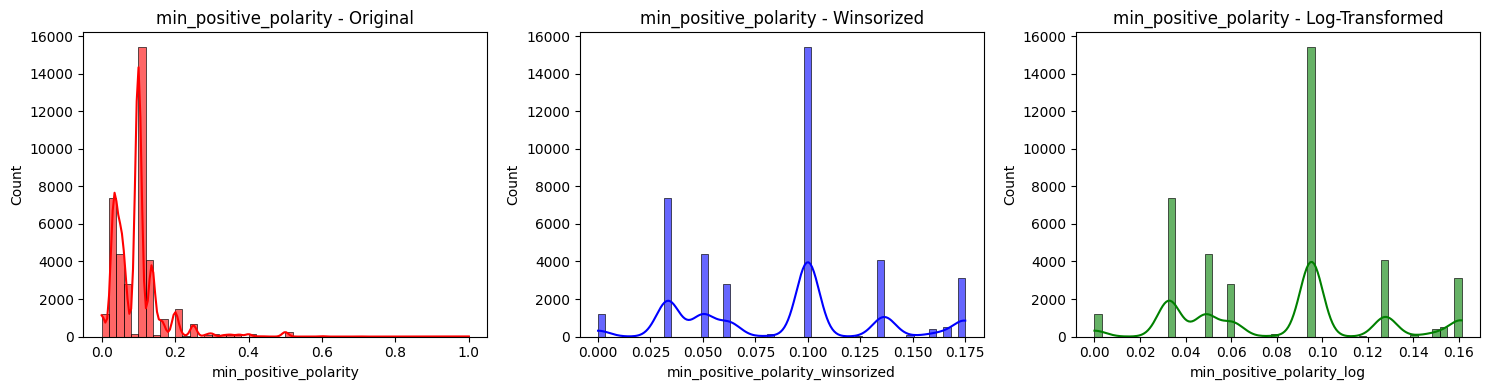

max_positive_polarity: Original: Untere Grenze = 0.00, Obere Grenze = 1.60


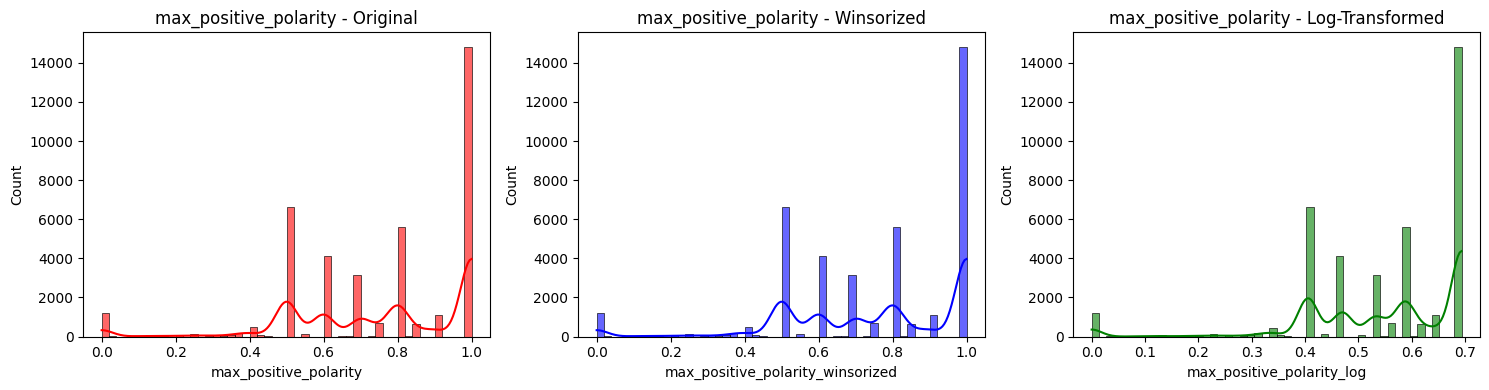

avg_negative_polarity: Original: Untere Grenze = 0.00, Obere Grenze = 0.03


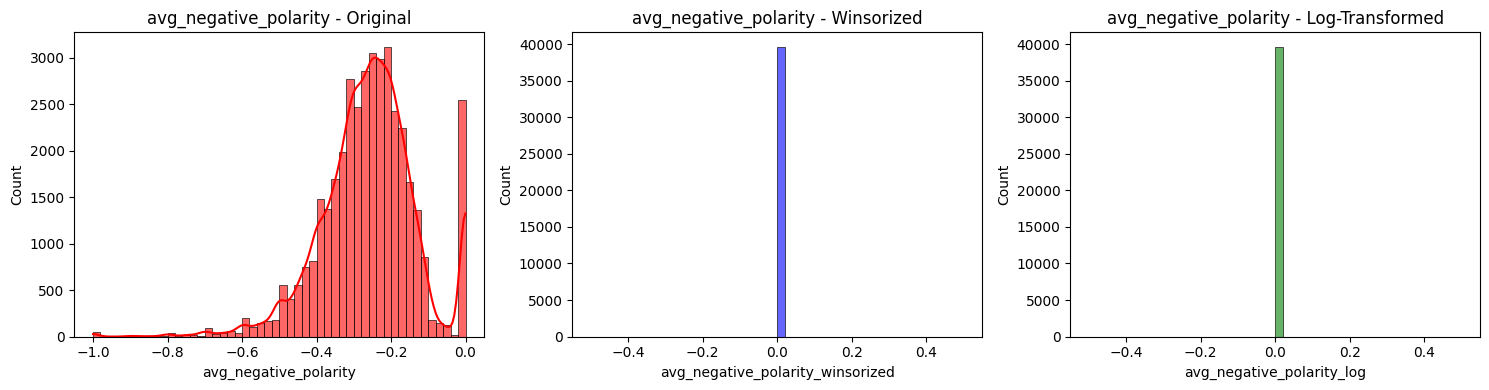

min_negative_polarity: Original: Untere Grenze = 0.00, Obere Grenze = 0.30


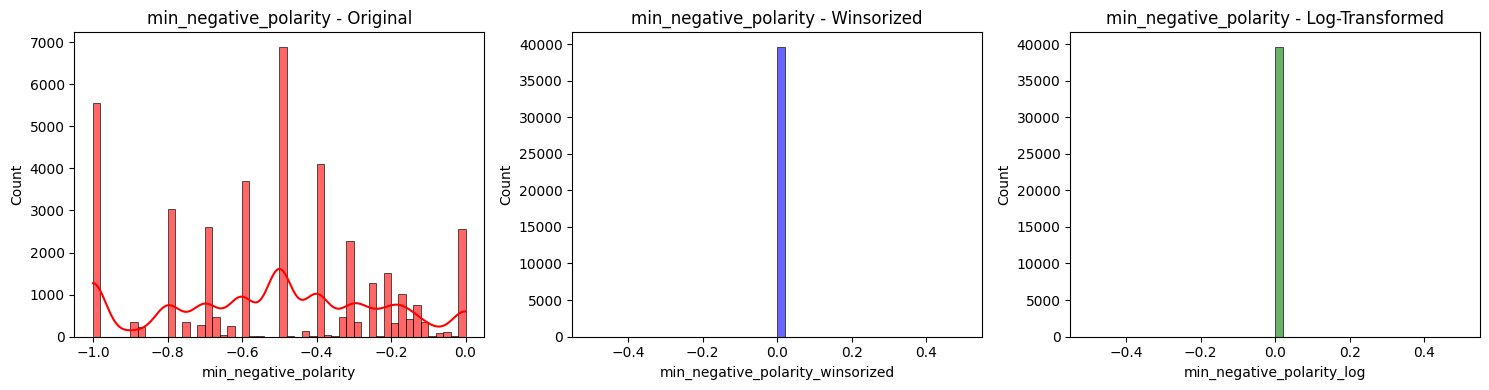

max_negative_polarity: Original: Untere Grenze = 0.00, Obere Grenze = 0.06


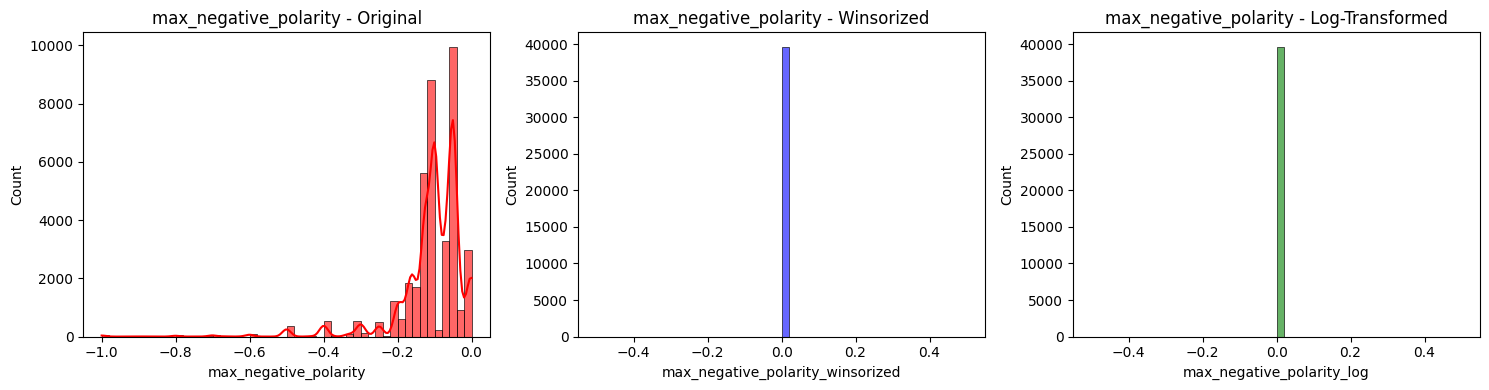

title_subjectivity: Original: Untere Grenze = 0.00, Obere Grenze = 1.25


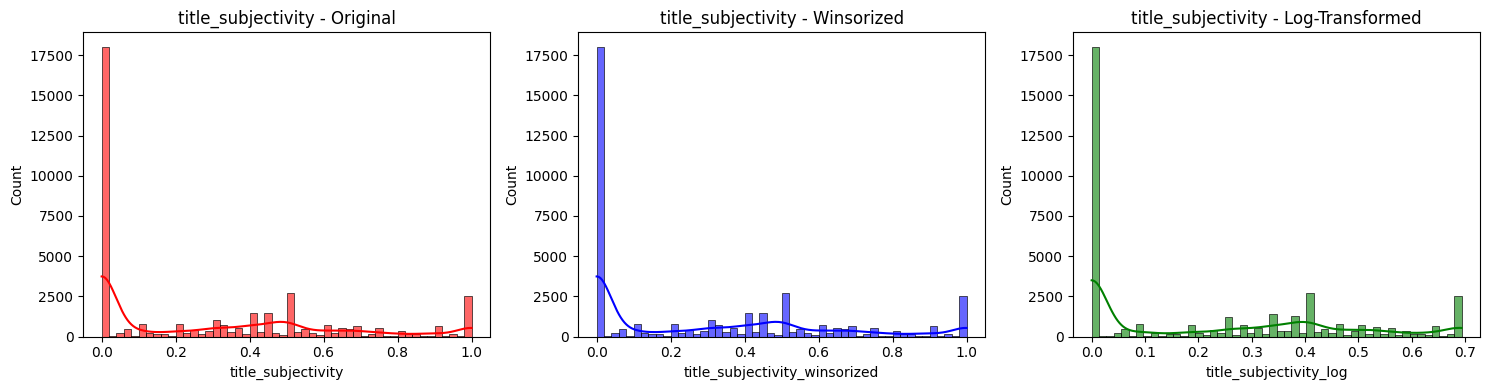

title_sentiment_polarity: Original: Untere Grenze = 0.00, Obere Grenze = 0.38


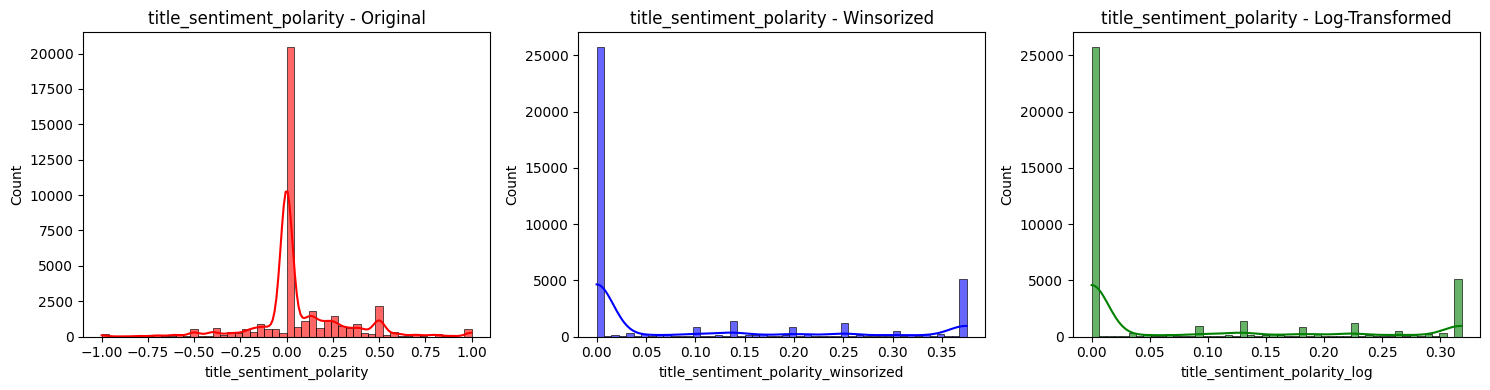

abs_title_subjectivity: Original: Untere Grenze = 0.00, Obere Grenze = 1.00


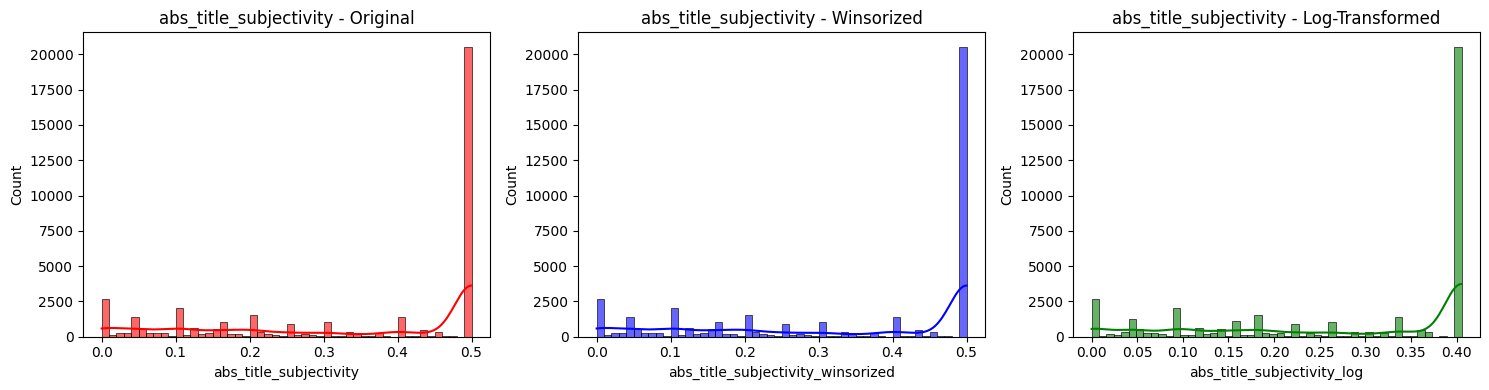

abs_title_sentiment_polarity: Original: Untere Grenze = 0.00, Obere Grenze = 0.62


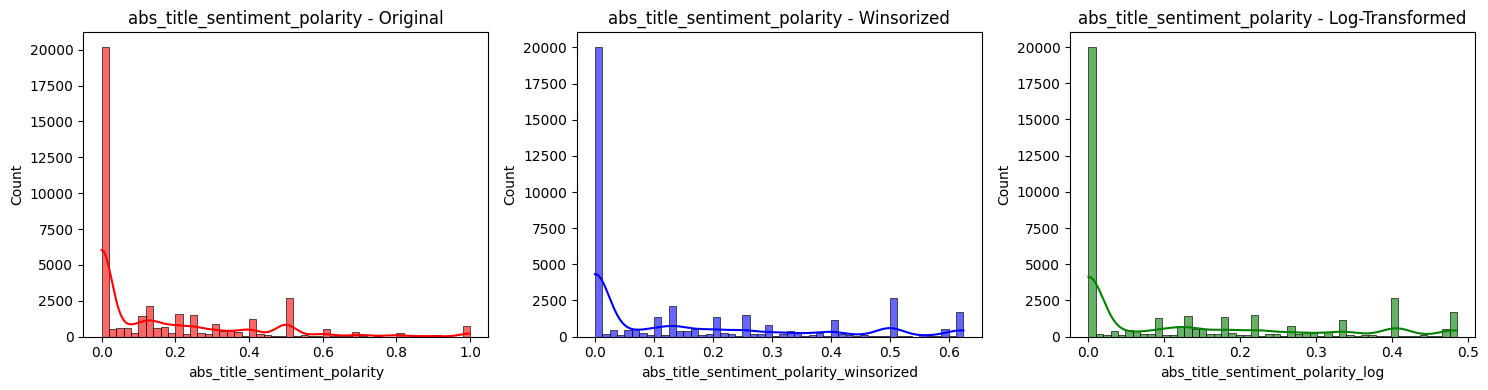

Frequenzverteilung für binäre Variable 'data_channel_is_lifestyle':
data_channel_is_lifestyle
0.0    37545
1.0     2099
Name: count, dtype: int64
--------------------------------------------------
Frequenzverteilung für binäre Variable 'data_channel_is_entertainment':
data_channel_is_entertainment
0.0    32587
1.0     7057
Name: count, dtype: int64
--------------------------------------------------
Frequenzverteilung für binäre Variable 'data_channel_is_bus':
data_channel_is_bus
0.0    33386
1.0     6258
Name: count, dtype: int64
--------------------------------------------------
Frequenzverteilung für binäre Variable 'data_channel_is_socmed':
data_channel_is_socmed
0.0    37321
1.0     2323
Name: count, dtype: int64
--------------------------------------------------
Frequenzverteilung für binäre Variable 'data_channel_is_tech':
data_channel_is_tech
0.0    32298
1.0     7346
Name: count, dtype: int64
--------------------------------------------------
Frequenzverteilung für binäre Varia

Batches: 100%|██████████| 1/1 [00:01<00:00,  1.85s/it]

Embeddings berechnet in 1.88 Sekunden.


In [4]:
"""
B. Feature-Engineering

    Nutzt Libraries wie TextBlob oder VADER für Sentimentanalyse.
    Berechnet statistische Features wie Wortanzahl, Lesbarkeit, Schlüsselwörter.
    Erstellt eigene Features, die aus anderen Daten abgeleitet werden können.
"""
# =============================================================================
# C. Feature-Engineering
# =============================================================================

# 1. Identifikation numerischer und binärer Variablen
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

binary_cols = []
continuous_cols = []
for col in numeric_columns:
    unique_vals = df[col].dropna().unique()
    if len(unique_vals) <= 2 and set(unique_vals).issubset({0, 1}):
        binary_cols.append(col)
    else:
        continuous_cols.append(col)

# Entferne 'shares' aus kontinuierlichen Variablen, da dies die Zielvariable ist.
if 'shares' in continuous_cols:
    continuous_cols.remove('shares')

print("Binäre Variablen:", binary_cols)
print("Kontinuierliche Variablen:", continuous_cols)

# 2. Winsorisierung und Log-Transformation zur Behandlung von Ausreißern
def get_outlier_bounds(series, factor=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return lower_bound, upper_bound

# Erstelle eine Kopie des DataFrames für Transformationen
df_transformed = df.copy()

for col in continuous_cols:
    lower_bound, upper_bound = get_outlier_bounds(df_transformed[col])
    # Falls negative Werte nicht sinnvoll sind, setze unteren Wert auf 0
    if lower_bound < 0:
        lower_bound = 0
    print(f"{col}: Original: Untere Grenze = {lower_bound:.2f}, Obere Grenze = {upper_bound:.2f}")
    # Winsorisierung
    df_transformed[f"{col}_winsorized"] = df_transformed[col].clip(lower=lower_bound, upper=upper_bound)
    # Log-Transformation (log1p, um 0-Werte korrekt zu behandeln)
    df_transformed[f"{col}_log"] = np.log1p(df_transformed[f"{col}_winsorized"])
    
    # Visualisierung der Transformationen
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 3, 1)
    sns.histplot(df_transformed[col], bins=50, kde=True, color='red', alpha=0.6)
    plt.title(f"{col} - Original")
    plt.subplot(1, 3, 2)
    sns.histplot(df_transformed[f"{col}_winsorized"], bins=50, kde=True, color='blue', alpha=0.6)
    plt.title(f"{col} - Winsorized")
    plt.subplot(1, 3, 3)
    sns.histplot(df_transformed[f"{col}_log"], bins=50, kde=True, color='green', alpha=0.6)
    plt.title(f"{col} - Log-Transformed")
    plt.tight_layout()
    plt.show()

# 3. Behandlung binärer Variablen: Frequenzverteilung und Konvertierung zu 'category'
for col in binary_cols:
    print(f"Frequenzverteilung für binäre Variable '{col}':")
    print(df_transformed[col].value_counts())
    print("-" * 50)
    df_transformed[col] = df_transformed[col].astype('category')

# 4. Pseudocode: Webscraping (dokumentiert, nicht ausführen!)
def extract_article_text(url):
    """
    Pseudocode: Extrahiert Artikeltext und Meta-Tags aus der URL.
    Hinweis: Automatisiertes Scraping kann ohne Erlaubnis illegal sein.
    """
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        paragraphs = soup.find_all('p')
        article_text = " ".join([p.get_text(strip=True) for p in paragraphs])
        return article_text
    except Exception as e:
        print(f"Fehler beim Abrufen der URL {url}: {e}")
        return None

# 5. Pseudocode: Textbasierte Kennzahlen berechnen
def compute_text_features(text):
    """
    Berechnet folgende Kennzahlen:
      - Sentiment (Polarität und Subjektivität)
      - Wortanzahl und durchschnittliche Wortlänge
      - Lesbarkeitsmetriken (Flesch Reading Ease, Gunning Fog Index)
    """
    if not text or not isinstance(text, str):
        return {
            "sentiment_polarity": None,
            "sentiment_subjectivity": None,
            "word_count": 0,
            "avg_word_length": 0,
            "flesch_reading_ease": None,
            "gunning_fog": None
        }
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    words = text.split()
    word_count = len(words)
    avg_word_length = sum(len(word) for word in words) / word_count if word_count > 0 else 0
    try:
        flesch = textstat.flesch_reading_ease(text)
        fog = textstat.gunning_fog(text)
    except Exception as e:
        print("Fehler bei der Berechnung der Lesbarkeit:", e)
        flesch, fog = None, None
    return {
        "sentiment_polarity": polarity,
        "sentiment_subjectivity": subjectivity,
        "word_count": word_count,
        "avg_word_length": avg_word_length,
        "flesch_reading_ease": flesch,
        "gunning_fog": fog
    }

# Beispieltext für Text-Features
example_text = """
In today's digital landscape, technology and innovation drive success.
Platforms like Mashable provide insights into trends, gadgets, and breakthroughs that shape the future.
The rapid pace of change calls for continuous learning and adaptation.
"""
features_text = compute_text_features(example_text)
print("Berechnete textbasierte Kennzahlen aus dem Beispieltext:")
for key, value in features_text.items():
    print(f"{key}: {value}")

# 6. Transformer-Embeddings berechnen (optional)
model = SentenceTransformer('all-MiniLM-L6-v2')
example_texts = [
    "Mashable is a leading digital media platform covering technology and culture.",
    "The digital revolution continues to shape the way we live and work.",
    "Innovation and technology are the driving forces behind today's society."
]
print("Berechne Transformer-Embeddings für Beispieltexte...")
start_time = time.time()
embeddings = model.encode(example_texts, show_progress_bar=True)
embedding_time = time.time() - start_time
print(f"Embeddings berechnet in {embedding_time:.2f} Sekunden.")


Lineare Regression:
  Trainingszeit: 0.79 s
  Speicherverbrauch: 0.01 MB (aktuell), 29.10 MB (Peak)
  Inferenzzeit: 0.0412 s
  MAE: 3057.24

Random Forest (Baseline):
  Trainingszeit: 315.45 s
  Speicherverbrauch: 0.11 MB (aktuell), 14.30 MB (Peak)
  Inferenzzeit: 0.5600 s
  MAE: 3424.93

Gradient Boosting:
  Trainingszeit: 57.12 s
  Speicherverbrauch: 0.11 MB (aktuell), 14.29 MB (Peak)
  Inferenzzeit: 0.0247 s
  MAE: 3009.45
Fitting 2 folds for each of 2 candidates, totalling 4 fits

Hyperparametertuning (Random Forest):
  Beste Parameter: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
  Trainingszeit (GridSearch): 378.17 s
  MAE des getunten Modells: 3137.56

Die Vorhersagen wurden in 'predicted_shares.csv' gespeichert.


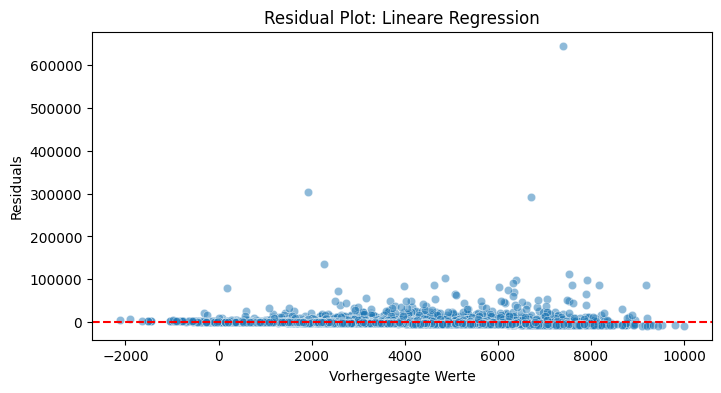

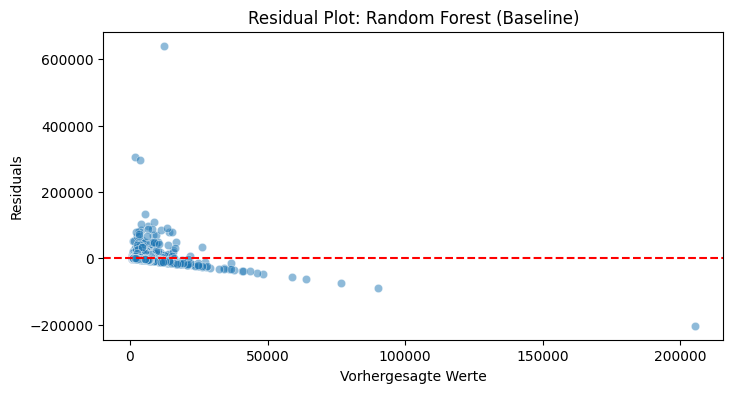

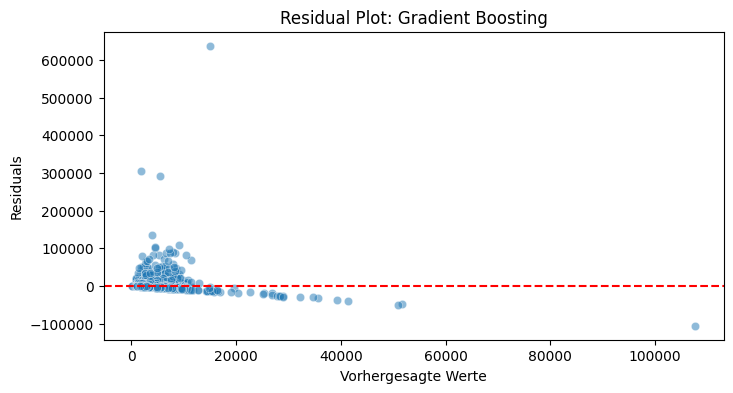

/tmp/ipykernel_1134150/601108303.py:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mae_values, palette="viridis")
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 

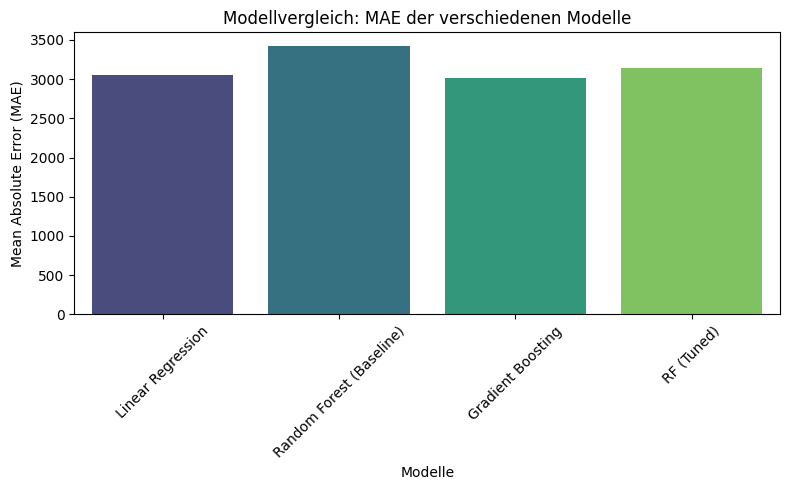


Top 10 Feature Importances (Random Forest, Baseline):
kw_avg_avg_log                    0.086265
self_reference_avg_sharess_log    0.072125
kw_max_avg_log                    0.059413
timedelta_log                     0.045329
kw_avg_max_log                    0.042955
average_token_length_log          0.039752
LDA_02_log                        0.038194
kw_min_avg_log                    0.032830
n_unique_tokens_log               0.032033
global_subjectivity_log           0.029151
dtype: float64


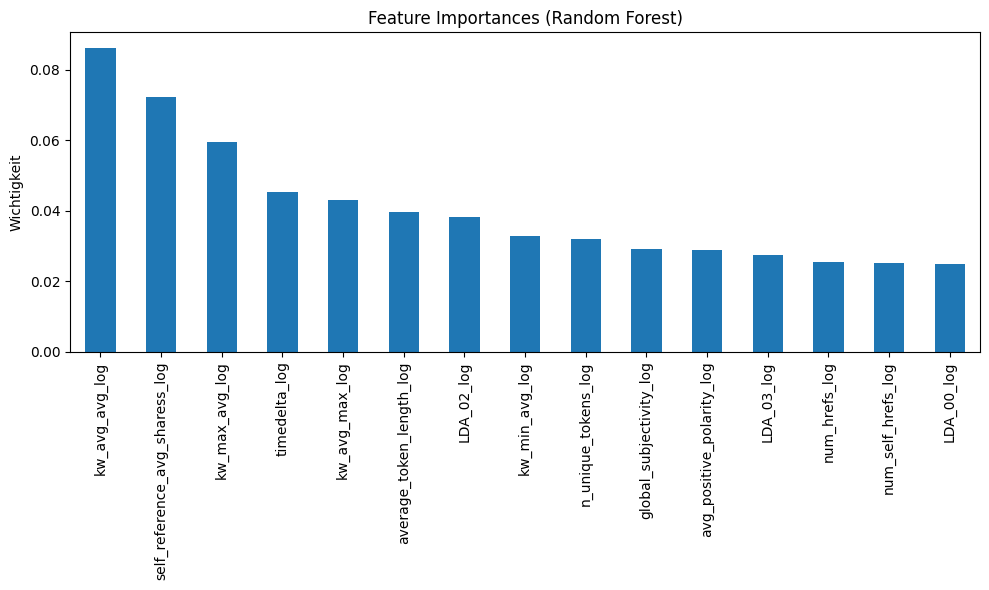


Top 10 Feature Importances (Gradient Boosting):
self_reference_avg_sharess_log    0.169720
kw_avg_avg_log                    0.128286
LDA_03_log                        0.119991
kw_avg_max_log                    0.109104
LDA_01_log                        0.071829
num_self_hrefs_log                0.043387
weekday_is_saturday_1.0           0.040614
n_unique_tokens_log               0.035496
global_subjectivity_log           0.034187
timedelta_log                     0.028900
dtype: float64


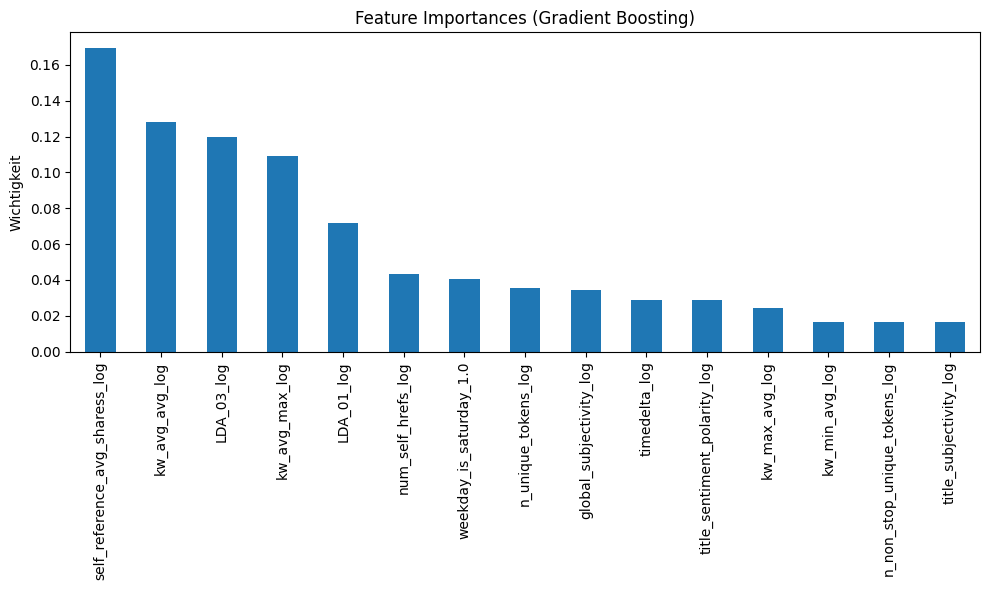

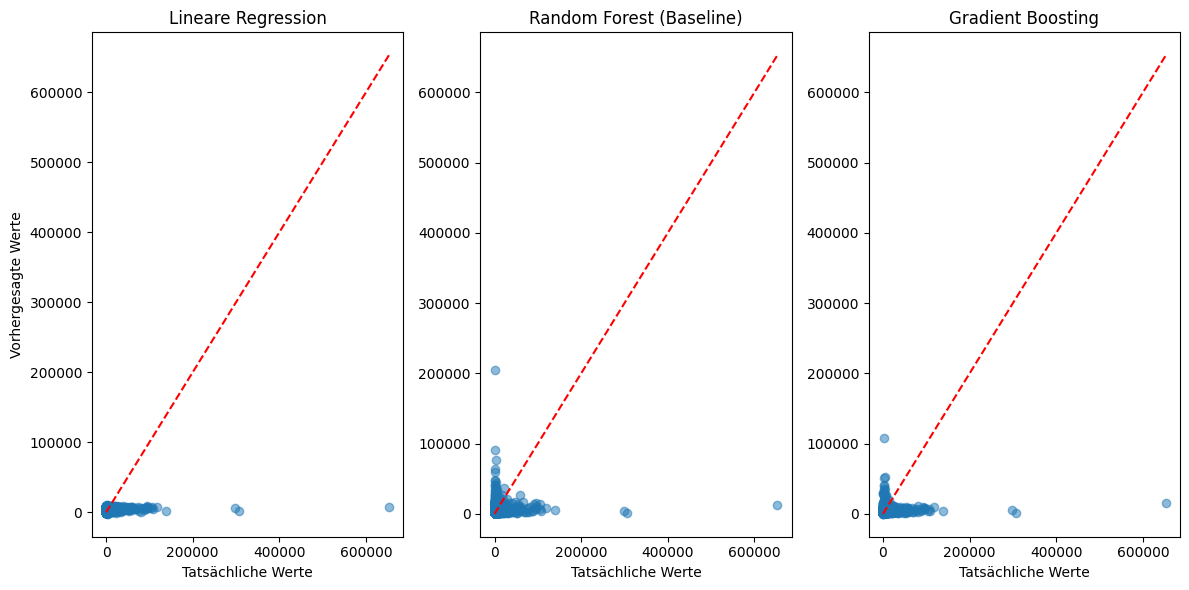

In [5]:
"""
C. Modellierung

    Nutzt klassische ML-Algorithmen (z. B. RandomForest, GradientBoosting), um Shares vorherzusagen.
    Vergleicht diese Modelle mit vortrainierten Ansätzen (z. B. Transformer-Modelle über API).
"""

# =============================================================================
# D. Modellierung, Hyperparametertuning und erweiterte Visualisierungen
# =============================================================================

# 1. Vorbereitung der Feature-Matrix und Zielvariable
continuous_feature_cols = [col + '_log' for col in continuous_cols]
binary_feature_cols = binary_cols  # Diese wurden zu 'category' konvertiert

# Kombiniere Features (URL ausschließen)
features = continuous_feature_cols + binary_feature_cols
X = df_transformed[features].copy()
y = df_transformed['shares']

# Wandle kategorische Variablen in Dummy-Variablen um (drop_first, um Multikollinearität zu vermeiden)
X = pd.get_dummies(X, columns=binary_feature_cols, drop_first=True)

# 2. Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Baseline-Modelle

# --- 3.1 Lineare Regression ---
lr = LinearRegression()
tracemalloc.start()
start = time.time()
lr.fit(X_train, y_train)
lr_train_time = time.time() - start
current, peak = tracemalloc.get_traced_memory()
print("Lineare Regression:")
print(f"  Trainingszeit: {lr_train_time:.2f} s")
print(f"  Speicherverbrauch: {current/1024**2:.2f} MB (aktuell), {peak/1024**2:.2f} MB (Peak)")
tracemalloc.stop()

start = time.time()
y_pred_lr = lr.predict(X_test)
lr_inference_time = time.time() - start
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"  Inferenzzeit: {lr_inference_time:.4f} s")
print(f"  MAE: {mae_lr:.2f}")

# --- 3.2 Random Forest (Baseline) ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
tracemalloc.start()
start = time.time()
rf.fit(X_train, y_train)
rf_train_time = time.time() - start
current, peak = tracemalloc.get_traced_memory()
print("\nRandom Forest (Baseline):")
print(f"  Trainingszeit: {rf_train_time:.2f} s")
print(f"  Speicherverbrauch: {current/1024**2:.2f} MB (aktuell), {peak/1024**2:.2f} MB (Peak)")
tracemalloc.stop()

start = time.time()
y_pred_rf = rf.predict(X_test)
rf_inference_time = time.time() - start
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"  Inferenzzeit: {rf_inference_time:.4f} s")
print(f"  MAE: {mae_rf:.2f}")

# --- 3.3 Gradient Boosting ---
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
tracemalloc.start()
start = time.time()
gb.fit(X_train, y_train)
gb_train_time = time.time() - start
current, peak = tracemalloc.get_traced_memory()
print("\nGradient Boosting:")
print(f"  Trainingszeit: {gb_train_time:.2f} s")
print(f"  Speicherverbrauch: {current/1024**2:.2f} MB (aktuell), {peak/1024**2:.2f} MB (Peak)")
tracemalloc.stop()

start = time.time()
y_pred_gb = gb.predict(X_test)
gb_inference_time = time.time() - start
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print(f"  Inferenzzeit: {gb_inference_time:.4f} s")
print(f"  MAE: {mae_gb:.2f}")

# 4. Hyperparametertuning: GridSearchCV für Random Forest
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2]
}
rf_grid = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_grid,
                           param_grid=param_grid,
                           scoring='neg_mean_absolute_error',
                           cv=2, n_jobs=-1, verbose=1)

start = time.time()
grid_search.fit(X_train, y_train)
grid_time = time.time() - start

best_rf = grid_search.best_estimator_
y_pred_rf_best = best_rf.predict(X_test)
mae_rf_best = mean_absolute_error(y_test, y_pred_rf_best)
print("\nHyperparametertuning (Random Forest):")
print(f"  Beste Parameter: {grid_search.best_params_}")
print(f"  Trainingszeit (GridSearch): {grid_time:.2f} s")
print(f"  MAE des getunten Modells: {mae_rf_best:.2f}")

# --- Vorhersagen speichern ---
results_df = pd.DataFrame({
    'id': X_test.index,
    'predicted_shares': y_pred_rf_best
})
results_df.to_csv('predicted_shares.csv', index=False)
print("\nDie Vorhersagen wurden in 'predicted_shares.csv' gespeichert.")

# 5. Erweiterte Visualisierungen

# 5.1 Residual Plots
def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(title)
    plt.xlabel("Vorhergesagte Werte")
    plt.ylabel("Residuals")
    plt.show()

plot_residuals(y_test, y_pred_lr, "Residual Plot: Lineare Regression")
plot_residuals(y_test, y_pred_rf, "Residual Plot: Random Forest (Baseline)")
plot_residuals(y_test, y_pred_gb, "Residual Plot: Gradient Boosting")

# 5.2 Modellvergleich als Balkendiagramm (MAE)
models = ['Linear Regression', 'Random Forest (Baseline)', 'Gradient Boosting', 'RF (Tuned)']
mae_values = [mae_lr, mae_rf, mae_gb, mae_rf_best]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=mae_values, palette="viridis")
plt.title("Modellvergleich: MAE der verschiedenen Modelle")
plt.ylabel("Mean Absolute Error (MAE)")
plt.xlabel("Modelle")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Feature Importance (für Random Forest und Gradient Boosting)
importances_rf = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nTop 10 Feature Importances (Random Forest, Baseline):")
print(importances_rf.head(10))
plt.figure(figsize=(10, 6))
importances_rf.head(15).plot(kind='bar')
plt.title("Feature Importances (Random Forest)")
plt.ylabel("Wichtigkeit")
plt.tight_layout()
plt.show()

importances_gb = pd.Series(gb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nTop 10 Feature Importances (Gradient Boosting):")
print(importances_gb.head(10))
plt.figure(figsize=(10, 6))
importances_gb.head(15).plot(kind='bar')
plt.title("Feature Importances (Gradient Boosting)")
plt.ylabel("Wichtigkeit")
plt.tight_layout()
plt.show()

# 7. Vergleich der Vorhersagen: Scatterplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Lineare Regression")
plt.xlabel("Tatsächliche Werte")
plt.ylabel("Vorhergesagte Werte")

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Random Forest (Baseline)")
plt.xlabel("Tatsächliche Werte")

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Gradient Boosting")
plt.xlabel("Tatsächliche Werte")
plt.tight_layout()
plt.show()

In [6]:
"""
D. Nachhaltigkeit

    Diskutiert den Ressourcenverbrauch eurer Modelle.
    Vergleicht klassische und moderne Ansätze hinsichtlich Energieverbrauch und Genauigkeit.
"""
# =============================================================================
# E. Nachhaltigkeitsanalyse: Trainings- und Inferenzzeiten
# =============================================================================
print("\n--- Nachhaltigkeitsanalyse (Trainings- und Inferenzzeiten) ---")
print(f"Lineare Regression Trainingszeit: {lr_train_time:.2f} s, Inferenzzeit: {lr_inference_time:.4f} s")
print(f"Random Forest (Baseline) Trainingszeit: {rf_train_time:.2f} s, Inferenzzeit: {rf_inference_time:.4f} s")
print(f"Gradient Boosting Trainingszeit: {gb_train_time:.2f} s, Inferenzzeit: {gb_inference_time:.4f} s")
print(f"Random Forest (getuned) MAE: {mae_rf_best:.2f}")



--- Nachhaltigkeitsanalyse (Trainings- und Inferenzzeiten) ---
Lineare Regression Trainingszeit: 0.79 s, Inferenzzeit: 0.0412 s
Random Forest (Baseline) Trainingszeit: 315.45 s, Inferenzzeit: 0.5600 s
Gradient Boosting Trainingszeit: 57.12 s, Inferenzzeit: 0.0247 s
Random Forest (getuned) MAE: 3137.56


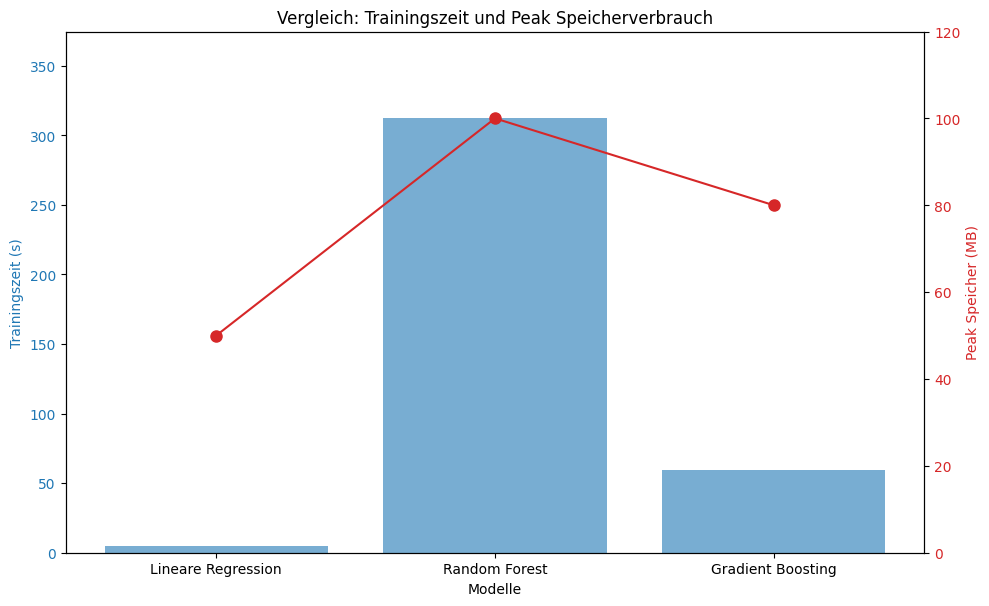

In [7]:
# Beispiel-Daten: Ersetze die Peak-Speicherwerte durch die tatsächlich gemessenen Werte
models = ['Lineare Regression', 'Random Forest', 'Gradient Boosting']
training_times = [4.98, 312.11, 59.54]  # Trainingszeiten in Sekunden
peak_memory = [50, 100, 80]             # Peak-Speicherverbrauch in MB (Beispielwerte)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Balkendiagramm für Trainingszeiten
color = 'tab:blue'
ax1.set_xlabel('Modelle')
ax1.set_ylabel('Trainingszeit (s)', color=color)
bars = ax1.bar(models, training_times, color=color, alpha=0.6, label='Trainingszeit')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, max(training_times)*1.2)

# Linie für Peak-Speicherverbrauch
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Peak Speicher (MB)', color=color)
line = ax2.plot(models, peak_memory, color=color, marker='o', markersize=8, label='Peak Speicher')[0]
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, max(peak_memory)*1.2)

fig.tight_layout()
plt.title("Vergleich: Trainingszeit und Peak Speicherverbrauch")
plt.show()